In [1]:
import pandas as pd

# 파일 경로
file_path = r"C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset\Inner Race Fault\S_IR(1).csv"

try:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    print(f"--- 파일: {file_path} ---")
    print("\n1. 데이터프레임의 첫 5행:")
    print(df.head())

    print("\n2. 데이터프레임 정보 (컬럼, Non-null 개수, Dtype):")
    df.info()

    print("\n3. 데이터프레임 통계 요약:")
    print(df.describe())

    print("\n4. 결측치 여부:")
    print(df.isnull().sum())

    print("\n5. 데이터프레임 형태 (행, 열):")
    print(df.shape)

    # 데이터 분포 확인 (수치형 컬럼이 여러 개일 경우)
    if len(df.columns) > 1:
        print("\n6. 각 컬럼의 고유값 개수:")
        for col in df.columns:
            print(f"  {col}: {df[col].nunique()} 고유값")

except FileNotFoundError:
    print(f"오류: 파일을 찾을 수 없습니다. 경로를 다시 확인해주세요: {file_path}")
except Exception as e:
    print(f"파일을 읽는 중 오류가 발생했습니다: {e}")

--- 파일: C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset\Inner Race Fault\S_IR(1).csv ---

1. 데이터프레임의 첫 5행:
          0
0  0.000000
1 -0.000153
2  0.000000
3  0.000000
4  0.000000

2. 데이터프레임 정보 (컬럼, Non-null 개수, Dtype):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       99999 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB

3. 데이터프레임 통계 요약:
                  0
count  9.999900e+04
mean  -6.744452e-07
std    1.994849e-03
min   -3.814697e-03
25%   -1.831055e-03
50%    0.000000e+00
75%    1.831055e-03
max    3.814697e-03

4. 결측치 여부:
0    0
dtype: int64

5. 데이터프레임 형태 (행, 열):
(99999, 1)


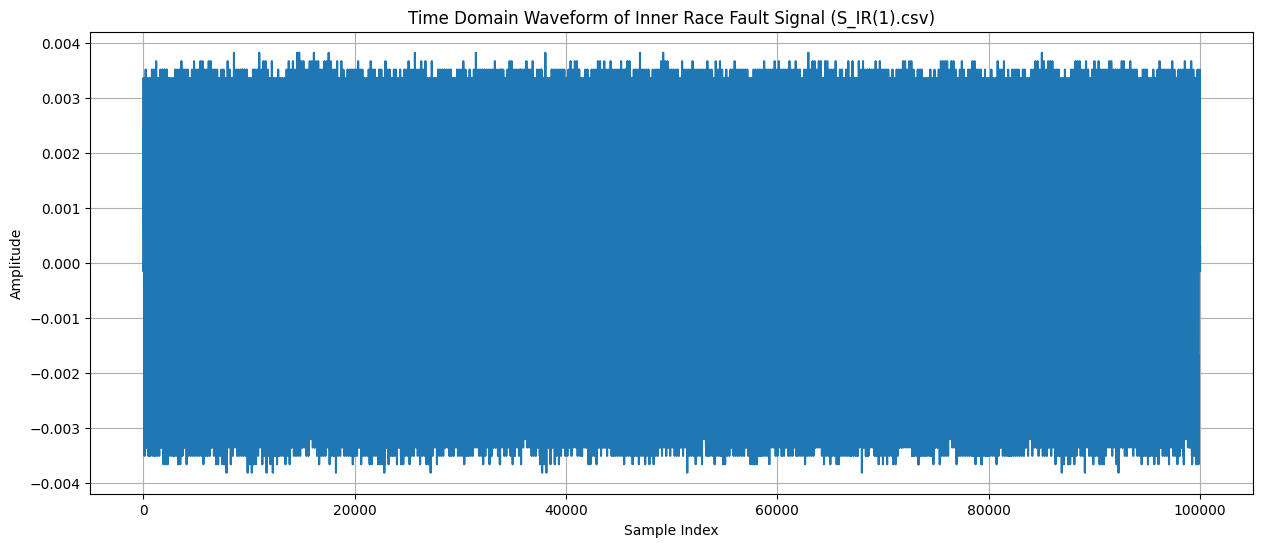

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = r"C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset\Inner Race Fault\S_IR(1).csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['0'])
plt.title('Time Domain Waveform of Inner Race Fault Signal (S_IR(1).csv)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

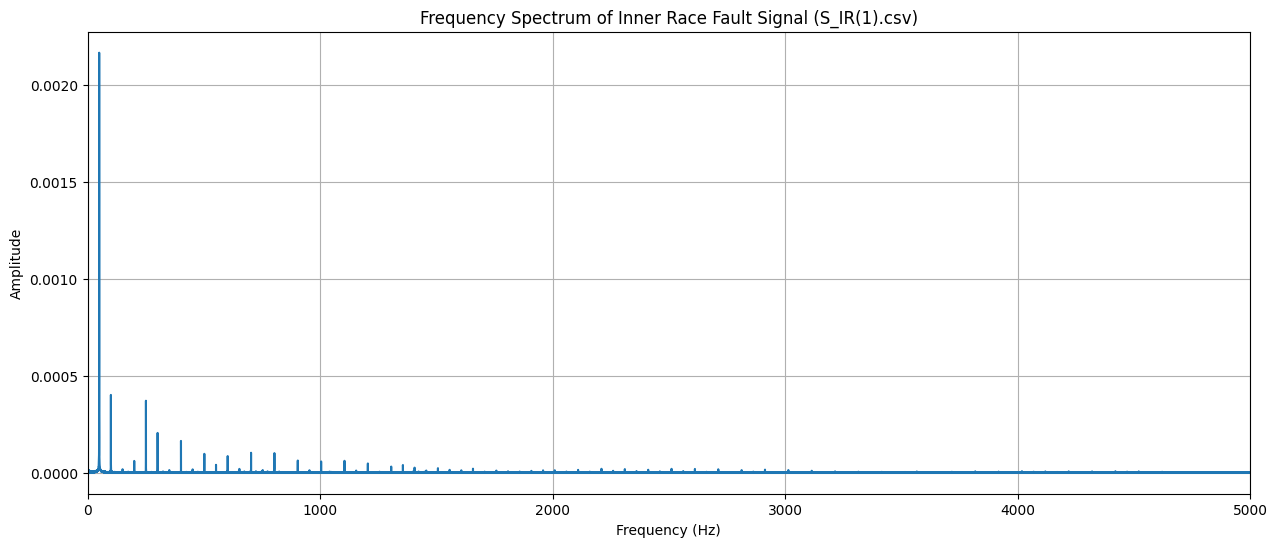

In [3]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import pandas as pd

# 샘플링 주파수 (논문에서 10 kHz로 언급 [cite: 1611])
sampling_rate = 10000 # Hz

file_path = r"C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset\Inner Race Fault\S_IR(1).csv"
df = pd.read_csv(file_path)
signal = df['0'].values

N = len(signal) # 신호의 길이
T = 1.0 / sampling_rate # 샘플링 간격

yf = fft(signal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2) # 주파수 축

plt.figure(figsize=(15, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Frequency Spectrum of Inner Race Fault Signal (S_IR(1).csv)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, sampling_rate / 2) # 나이퀴스트 주파수까지 표시
plt.show()

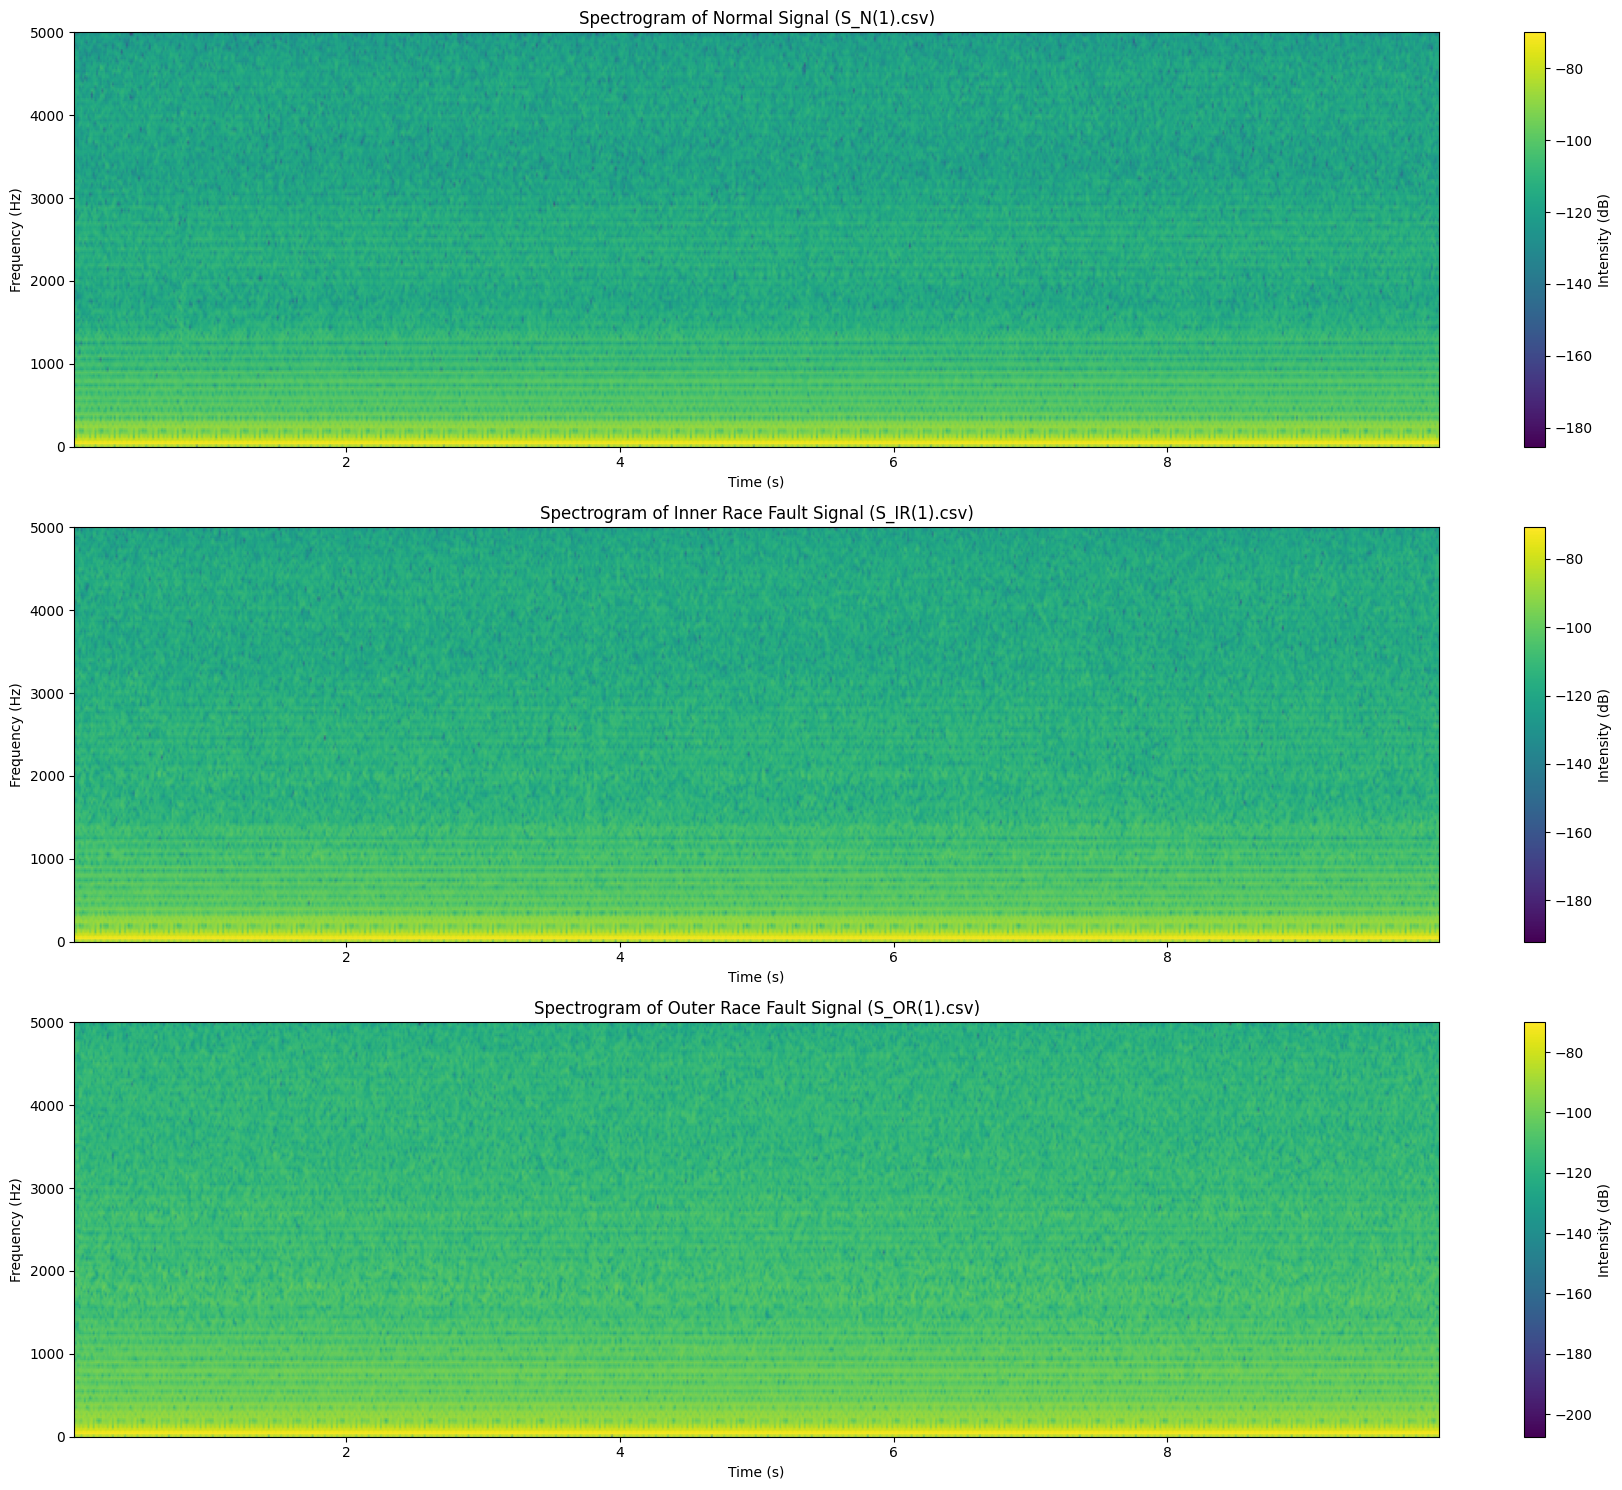

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import spectrogram
import os

# 데이터셋 기본 경로
base_path = r"C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset"

# 샘플링 주파수 (논문에서 10 kHz로 언급)
sampling_rate = 10000  # Hz

# 분석할 파일 목록 (각 클래스별 대표 샘플)
files_to_analyze = {
    'Normal': os.path.join(base_path, 'Normal', 'S_N(1).csv'),
    'Inner Race Fault': os.path.join(base_path, 'Inner Race Fault', 'S_IR(1).csv'),
    'Outer Race Fault': os.path.join(base_path, 'Outer Race Fault', 'S_OR(1).csv')
}

plt.figure(figsize=(18, 15))

for i, (class_name, file_path) in enumerate(files_to_analyze.items()):
    try:
        # CSV 파일 읽기
        df = pd.read_csv(file_path)
        signal = df['0'].values

        # 스펙트로그램 계산
        # nperseg: FFT에 사용될 세그먼트 길이 (샘플 수), 여기서는 256 샘플 (25.6ms) 사용
        # noverlap: 오버랩되는 샘플 수, nperseg의 50% 사용
        f, t, Sxx = spectrogram(signal, fs=sampling_rate, nperseg=256, noverlap=128)

        # 스펙트로그램 시각화 (서브플롯으로 각 클래스 표시)
        plt.subplot(3, 1, i + 1) # 3행 1열 서브플롯
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud') # dB 스케일로 변환
        plt.colorbar(label='Intensity (dB)')
        plt.title(f'Spectrogram of {class_name} Signal ({os.path.basename(file_path)})')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.ylim(0, sampling_rate / 2) # 나이퀴스트 주파수까지 표시

    except FileNotFoundError:
        print(f"오류: 파일을 찾을 수 없습니다. 경로를 다시 확인해주세요: {file_path}")
    except Exception as e:
        print(f"파일 '{os.path.basename(file_path)}' 처리 중 오류가 발생했습니다: {e}")

plt.tight_layout() # 서브플롯 간 간격 자동 조절
plt.show()

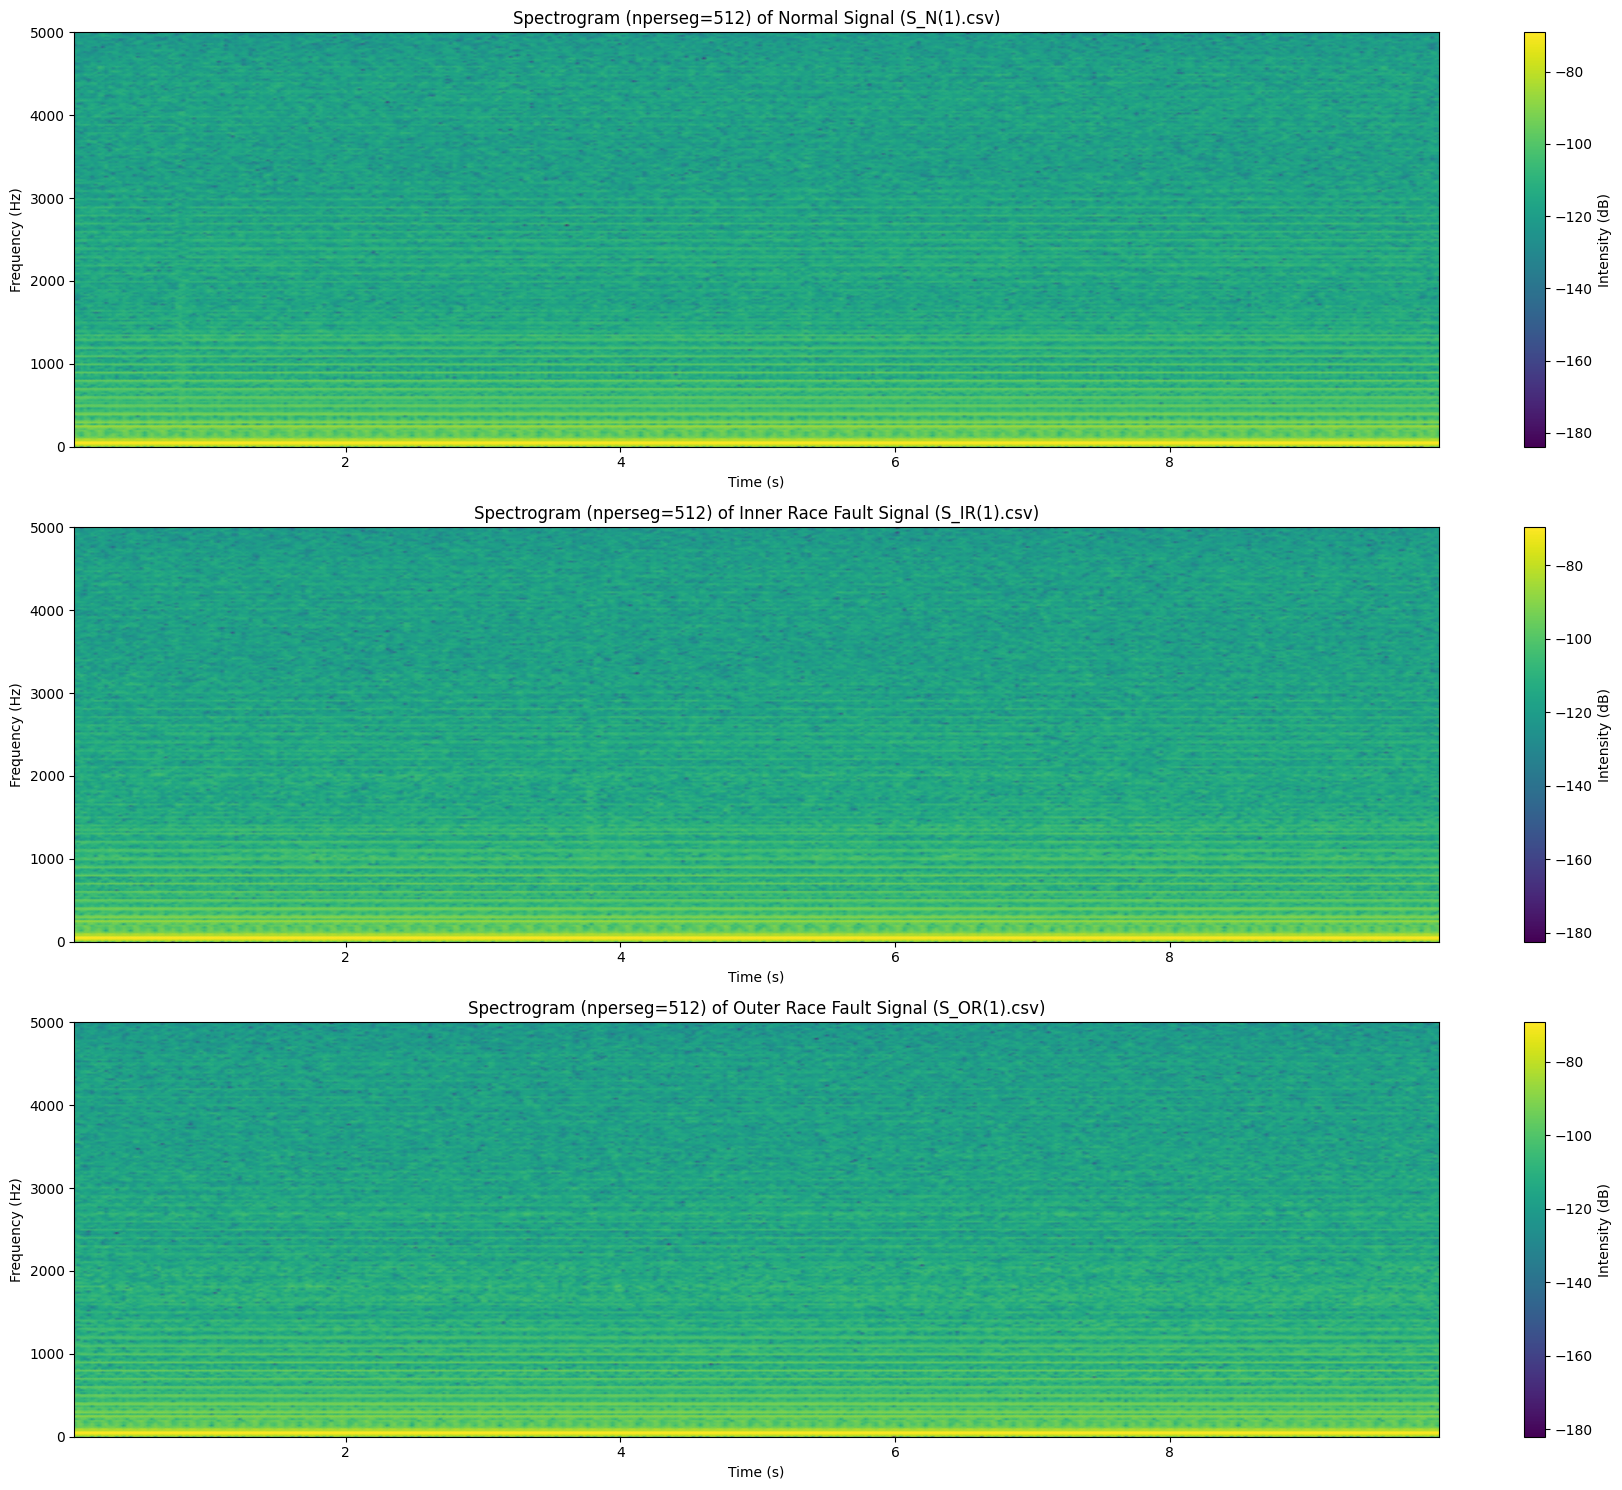

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import spectrogram
import os

# 데이터셋 기본 경로
base_path = r"C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset"

# 샘플링 주파수 (논문에서 10 kHz로 언급)
sampling_rate = 10000  # Hz

# 분석할 파일 목록 (각 클래스별 대표 샘플)
files_to_analyze = {
    'Normal': os.path.join(base_path, 'Normal', 'S_N(1).csv'),
    'Inner Race Fault': os.path.join(base_path, 'Inner Race Fault', 'S_IR(1).csv'),
    'Outer Race Fault': os.path.join(base_path, 'Outer Race Fault', 'S_OR(1).csv')
}

plt.figure(figsize=(18, 15))

# 스펙트로그램 파라미터 변경
nperseg_val = 512
noverlap_val = 256 # nperseg의 50%

for i, (class_name, file_path) in enumerate(files_to_analyze.items()):
    try:
        # CSV 파일 읽기
        df = pd.read_csv(file_path)
        signal = df['0'].values

        # 스펙트로그램 계산
        f, t, Sxx = spectrogram(signal, fs=sampling_rate, nperseg=nperseg_val, noverlap=noverlap_val)

        # 스펙트로그램 시각화 (서브플롯으로 각 클래스 표시)
        plt.subplot(3, 1, i + 1) # 3행 1열 서브플롯
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud') # dB 스케일로 변환
        plt.colorbar(label='Intensity (dB)')
        plt.title(f'Spectrogram (nperseg={nperseg_val}) of {class_name} Signal ({os.path.basename(file_path)})')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        plt.ylim(0, sampling_rate / 2) # 나이퀴스트 주파수까지 표시

    except FileNotFoundError:
        print(f"오류: 파일을 찾을 수 없습니다. 경로를 다시 확인해주세요: {file_path}")
    except Exception as e:
        print(f"파일 '{os.path.basename(file_path)}' 처리 중 오류가 발생했습니다: {e}")

plt.tight_layout() # 서브플롯 간 간격 자동 조절
plt.show()

100/6480 파일 처리 완료.
200/6480 파일 처리 완료.
300/6480 파일 처리 완료.
400/6480 파일 처리 완료.
500/6480 파일 처리 완료.
600/6480 파일 처리 완료.
700/6480 파일 처리 완료.
800/6480 파일 처리 완료.
900/6480 파일 처리 완료.
1000/6480 파일 처리 완료.
1100/6480 파일 처리 완료.
1200/6480 파일 처리 완료.
1300/6480 파일 처리 완료.
1400/6480 파일 처리 완료.
1500/6480 파일 처리 완료.
1600/6480 파일 처리 완료.
1700/6480 파일 처리 완료.
1800/6480 파일 처리 완료.
1900/6480 파일 처리 완료.
2000/6480 파일 처리 완료.
2100/6480 파일 처리 완료.
2200/6480 파일 처리 완료.
2300/6480 파일 처리 완료.
2400/6480 파일 처리 완료.
2500/6480 파일 처리 완료.
2600/6480 파일 처리 완료.
2700/6480 파일 처리 완료.
2800/6480 파일 처리 완료.
2900/6480 파일 처리 완료.
3000/6480 파일 처리 완료.
3100/6480 파일 처리 완료.
3200/6480 파일 처리 완료.
3300/6480 파일 처리 완료.
3400/6480 파일 처리 완료.
3500/6480 파일 처리 완료.
3600/6480 파일 처리 완료.
3700/6480 파일 처리 완료.
3800/6480 파일 처리 완료.
3900/6480 파일 처리 완료.
4000/6480 파일 처리 완료.
4100/6480 파일 처리 완료.
4200/6480 파일 처리 완료.
4300/6480 파일 처리 완료.
4400/6480 파일 처리 완료.
4500/6480 파일 처리 완료.
4600/6480 파일 처리 완료.
4700/6480 파일 처리 완료.
4800/6480 파일 처리 완료.
4900/6480 파일 처리 완료.
5000/6480 파일 처리 완료.
5100/6480

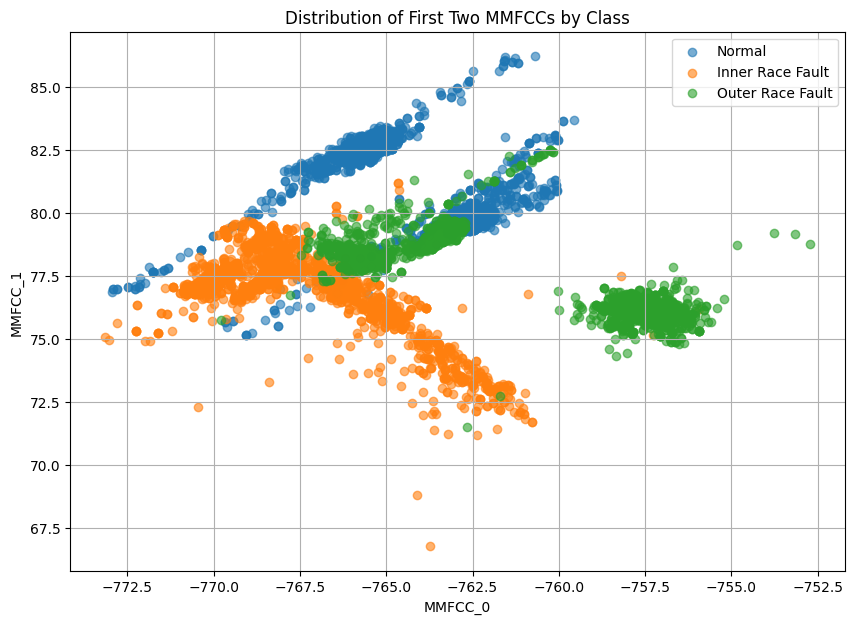


MMFCC 특징 추출 및 데이터셋 준비가 완료되었습니다.
이제 이 'features_df' DataFrame을 사용하여 딥러닝 모델(SVM, ANN 등)을 학습시킬 수 있습니다.


In [6]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

# --- 1. 설정 변수 ---
BASE_PATH = r"C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset"
SAMPLING_RATE = 10000  # Hz (논문에서 언급)
N_MFCC = 40            # 논문에서 40개의 MMFCC 추출
F_MIN = 0              # MMFCC의 Mel 필터 뱅크 최소 주파수
F_MAX = 5000           # MMFCC의 Mel 필터 뱅크 최대 주파수 (논문에서 0-5kHz 언급)
FRAME_LENGTH = 0.025   # 25ms (일반적인 음성/음향 분석 프레임 길이)
HOP_LENGTH = 0.010     # 10ms (일반적인 음성/음향 분석 홉 길이)

# --- 2. 파일 경로 및 레이블 수집 ---
data = []
labels = []
file_paths = []

for class_name in ['Normal', 'Inner Race Fault', 'Outer Race Fault']:
    class_path = os.path.join(BASE_PATH, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.csv'):
            full_path = os.path.join(class_path, filename)
            file_paths.append(full_path)
            labels.append(class_name)

# --- 3. MMFCC 특징 추출 함수 정의 ---
def extract_mmfcc(signal, sr, n_mfcc, f_min, f_max, frame_length, hop_length):
    # librosa.feature.mfcc는 pre-emphasis, windowing, FFT, Mel 필터링, Log, DCT를 포함합니다.
    # n_fft는 frame_length에 따라 결정됩니다.
    n_fft = int(sr * frame_length)
    hop_length_samples = int(sr * hop_length)

    # MFCC 추출
    mfccs = librosa.feature.mfcc(
        y=signal,
        sr=sr,
        n_mfcc=n_mfcc,
        fmin=f_min,
        fmax=f_max,
        n_fft=n_fft,
        hop_length=hop_length_samples
    )
    
    # 시간 축을 따라 MFCC 계수의 평균을 취하여 단일 특징 벡터 생성
    # (일반적으로 짧은 오디오 클립 분류에서 사용되는 방식)
    return np.mean(mfccs.T, axis=0)

# --- 4. 모든 파일에 대해 MMFCC 특징 추출 ---
extracted_features = []
for i, file_path in enumerate(file_paths):
    try:
        # CSV 파일 로드 (첫 번째 컬럼만 사용)
        signal = pd.read_csv(file_path).iloc[:, 0].values
        
        # MMFCC 추출
        mmfcc_features = extract_mmfcc(
            signal, SAMPLING_RATE, N_MFCC, F_MIN, F_MAX, FRAME_LENGTH, HOP_LENGTH
        )
        extracted_features.append(mmfcc_features)
        
        if (i + 1) % 100 == 0:
            print(f"{i + 1}/{len(file_paths)} 파일 처리 완료.")

    except Exception as e:
        print(f"오류 발생 - 파일: {file_path}, 오류: {e}")
        # 오류 발생 시 해당 파일 건너뛰기
        extracted_features.append(np.full(N_MFCC, np.nan)) # NaN으로 채워서 나중에 제거

# 추출된 특징과 레이블을 DataFrame으로 변환
features_df = pd.DataFrame(extracted_features)
features_df['label'] = labels

# NaN 값이 있는 행 제거 (오류로 인해 특징 추출 실패한 경우)
features_df.dropna(inplace=True)

print(f"\n--- MMFCC 특징 추출 완료 ---")
print(f"총 {len(features_df)}개의 샘플에서 특징 추출 성공.")
print("추출된 특징 DataFrame의 첫 5행:")
print(features_df.head())
print("\n각 레이블별 샘플 수:")
print(features_df['label'].value_counts())

# --- 5. (선택 사항) 추출된 특징의 분포 시각화 (PCA 또는 t-SNE 활용하여 2D로 차원 축소 후)
# 여기서는 간단히 첫 두 개의 MMFCC 계수 분포를 시각화 (실제로는 차원 축소 필요)
plt.figure(figsize=(10, 7))
for label in features_df['label'].unique():
    subset = features_df[features_df['label'] == label]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], label=label, alpha=0.6) # 첫 두 MMFCC 계수
plt.title('Distribution of First Two MMFCCs by Class')
plt.xlabel('MMFCC_0')
plt.ylabel('MMFCC_1')
plt.legend()
plt.grid(True)
plt.show()

print("\nMMFCC 특징 추출 및 데이터셋 준비가 완료되었습니다.")
print("이제 이 'features_df' DataFrame을 사용하여 딥러닝 모델(SVM, ANN 등)을 학습시킬 수 있습니다.")


## 모델학습

학습 세트 크기: (5184, 40)
테스트 세트 크기: (1296, 40)

학습 세트 레이블 분포:
label
Inner Race Fault    0.333333
Normal              0.333333
Outer Race Fault    0.333333
Name: proportion, dtype: float64

테스트 세트 레이블 분포:
label
Normal              0.333333
Inner Race Fault    0.333333
Outer Race Fault    0.333333
Name: proportion, dtype: float64

데이터 스케일링 완료.

--- SVM 모델 학습 시작 ---
SVM 모델 학습 완료.

--- 모델 평가 ---
정확도 (Accuracy): 1.0000

분류 보고서:
                  precision    recall  f1-score   support

Inner Race Fault       1.00      1.00      1.00       432
          Normal       1.00      1.00      1.00       432
Outer Race Fault       1.00      1.00      1.00       432

        accuracy                           1.00      1296
       macro avg       1.00      1.00      1.00      1296
    weighted avg       1.00      1.00      1.00      1296


혼동 행렬:
[[432   0   0]
 [  0 432   0]
 [  0   0 432]]


c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.

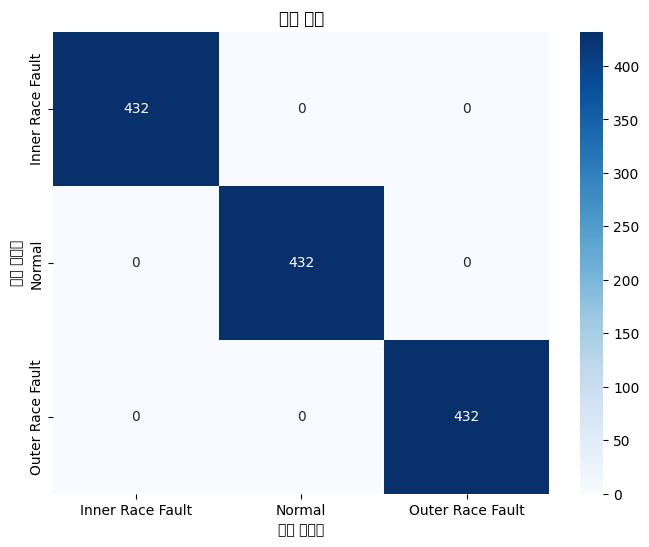


모델 학습 및 평가가 완료되었습니다.
이 결과를 바탕으로 모델의 성능을 분석하고, 필요에 따라 하이퍼파라미터 튜닝 또는 추가 전처리/특징 공학을 고려할 수 있습니다.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # Support Vector Classifier (논문에서 사용된 SVM-G)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 이전에 추출된 MMFCC 특징 DataFrame 'features_df'가 있다고 가정합니다.
# 만약 이전 코드를 다시 실행하지 않았다면, 'features_df'를 다시 생성해야 합니다.
# (이전에 제공된 MMFCC 추출 코드를 실행하여 'features_df'를 먼저 생성해주세요.)

# --- 1. 데이터 준비 ---
# features_df는 MMFCC 특징과 'label' 컬럼을 포함하고 있어야 합니다.
# 예시 DataFrame (실제 데이터는 MMFCC 추출 코드 실행 후 얻어집니다)
# data = np.random.rand(1000, 40) # 1000개 샘플, 40개 MMFCC 특징
# labels = np.random.choice(['Normal', 'Inner Race Fault', 'Outer Race Fault'], 1000)
# features_df = pd.DataFrame(data, columns=[f'mfcc_{i}' for i in range(40)])
# features_df['label'] = labels

# 특징 (X)과 레이블 (y) 분리
X = features_df.drop('label', axis=1)
y = features_df['label']

# --- 2. 데이터 분할 (학습 세트와 테스트 세트) ---
# test_size: 테스트 세트의 비율 (예: 20%)
# random_state: 재현 가능한 결과를 위한 시드
# stratify: 클래스 비율을 유지하며 분할 (클래스 불균형에 중요)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"학습 세트 크기: {X_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}")
print("\n학습 세트 레이블 분포:")
print(y_train.value_counts(normalize=True))
print("\n테스트 세트 레이블 분포:")
print(y_test.value_counts(normalize=True))

# --- 3. 데이터 스케일링 ---
# StandardScaler를 사용하여 평균 0, 표준편차 1로 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n데이터 스케일링 완료.")

# --- 4. 모델 학습 (Support Vector Machine) ---
# 논문에서 Gaussian Kernel (SVM-G)이 가장 좋은 성능을 보였으므로, rbf (Radial Basis Function) 커널 사용
print("\n--- SVM 모델 학습 시작 ---")
svm_model = SVC(kernel='rbf', random_state=42) # SVM-G
svm_model.fit(X_train_scaled, y_train)
print("SVM 모델 학습 완료.")

# --- 5. 모델 평가 ---
print("\n--- 모델 평가 ---")

# 테스트 세트 예측
y_pred = svm_model.predict(X_test_scaled)

# 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 (Accuracy): {accuracy:.4f}")

# 분류 보고서 (Precision, Recall, F1-Score 포함)
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:")
print(conf_matrix)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('혼동 행렬')
plt.show()

print("\n모델 학습 및 평가가 완료되었습니다.")
print("이 결과를 바탕으로 모델의 성능을 분석하고, 필요에 따라 하이퍼파라미터 튜닝 또는 추가 전처리/특징 공학을 고려할 수 있습니다.")


### K-Fold 교차검증을통한 성능 타당성 평가

In [8]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 이전에 추출된 MMFCC 특징 DataFrame 'features_df'가 있다고 가정합니다.
# (이전에 제공된 MMFCC 추출 코드를 실행하여 'features_df'를 먼저 생성해주세요.)

# 특징 (X)과 레이블 (y) 분리
X = features_df.drop('label', axis=1)
y = features_df['label']

# --- K-Fold 교차 검증 설정 ---
n_splits = 10 # 10-Fold 교차 검증 (논문과 동일)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 결과를 저장할 리스트
accuracies = []
precisions = []
recalls = []
f1_scores = []
all_conf_matrices = []

print(f"--- {n_splits}-Fold 교차 검증 시작 ---")

# 각 폴드(fold)에 대한 학습 및 평가
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}/{n_splits} 진행 중...")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM 모델 학습 (Gaussian Kernel)
    svm_model = SVC(kernel='rbf', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # 테스트 세트 예측
    y_pred = svm_model.predict(X_test_scaled)

    # 성능 지표 계산
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_precision = precision_score(y_test, y_pred, average='weighted')
    fold_recall = recall_score(y_test, y_pred, average='weighted')
    fold_f1 = f1_score(y_test, y_pred, average='weighted')
    fold_conf_matrix = confusion_matrix(y_test, y_pred, labels=svm_model.classes_) # labels 명시

    accuracies.append(fold_accuracy)
    precisions.append(fold_precision)
    recalls.append(fold_recall)
    f1_scores.append(fold_f1)
    all_conf_matrices.append(fold_conf_matrix)

    print(f"  정확도: {fold_accuracy:.4f}")
    print(f"  정밀도 (Weighted): {fold_precision:.4f}")
    print(f"  재현율 (Weighted): {fold_recall:.4f}")
    print(f"  F1-Score (Weighted): {fold_f1:.4f}")

# --- 교차 검증 결과 요약 ---
print(f"\n--- {n_splits}-Fold 교차 검증 최종 결과 ---")
print(f"평균 정확도: {np.mean(accuracies):.4f} (표준편차: {np.std(accuracies):.4f})")
print(f"평균 정밀도 (Weighted): {np.mean(precisions):.4f} (표준편차: {np.std(precisions):.4f})")
print(f"평균 재현율 (Weighted): {np.mean(recalls):.4f} (표준편차: {np.std(recalls):.4f})")
print(f"평균 F1-Score (Weighted): {np.mean(f1_scores):.4f} (표준편차: {np.std(f1_scores):.4f})")

# 모든 혼동 행렬의 합산 (선택 사항)
# total_conf_matrix = np.sum(all_conf_matrices, axis=0)
# print("\n총 혼동 행렬:")
# print(total_conf_matrix)

# # 총 혼동 행렬 시각화 (선택 사항)
# plt.figure(figsize=(8, 6))
# sns.heatmap(total_conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
# plt.xlabel('예측 레이블')
# plt.ylabel('실제 레이블')
# plt.title(f'Total Confusion Matrix ({n_splits}-Fold CV)')
# plt.show()

print("\n교차 검증을 통해 모델의 일반화 성능을 확인했습니다.")
print("이 결과를 바탕으로 모델의 견고성을 평가할 수 있습니다.")

--- 10-Fold 교차 검증 시작 ---

Fold 1/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 2/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 3/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 4/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 5/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 6/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 7/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 8/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weighted): 1.0000
  F1-Score (Weighted): 1.0000

Fold 9/10 진행 중...
  정확도: 1.0000
  정밀도 (Weighted): 1.0000
  재현율 (Weight

### 다음단계 1d-cnn기반 준비

학습 세트 X 형태: (5184, 40, 1)
테스트 세트 X 형태: (1296, 40, 1)
학습 세트 y 형태: (5184, 3)
테스트 세트 y 형태: (1296, 3)


/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,939 (226.32 KB)

 Trainable params: 57,939 (226.32 KB)

 Non-trainable params: 0 (0.00 B)


--- 1D CNN 모델 학습 시작 ---
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7877 - loss: 0.5000 - val_accuracy: 0.9884 - val_loss: 0.0327
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0331 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9974 - loss: 0.0090 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 1.2844e-04
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 2.9664e-04
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 1.0379e-04
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48

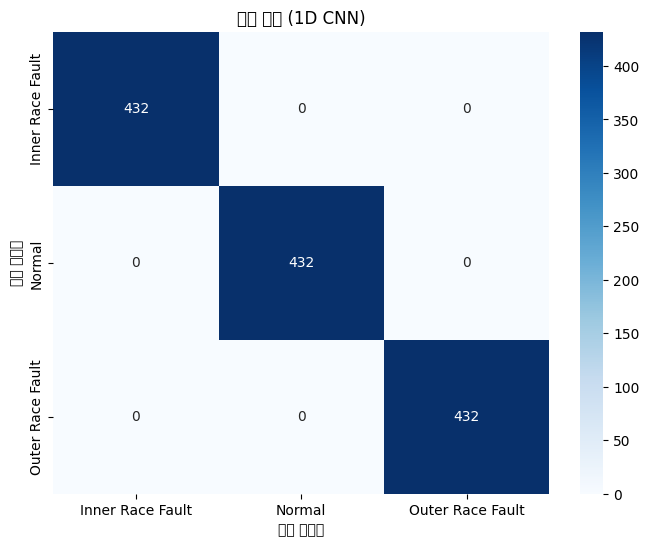

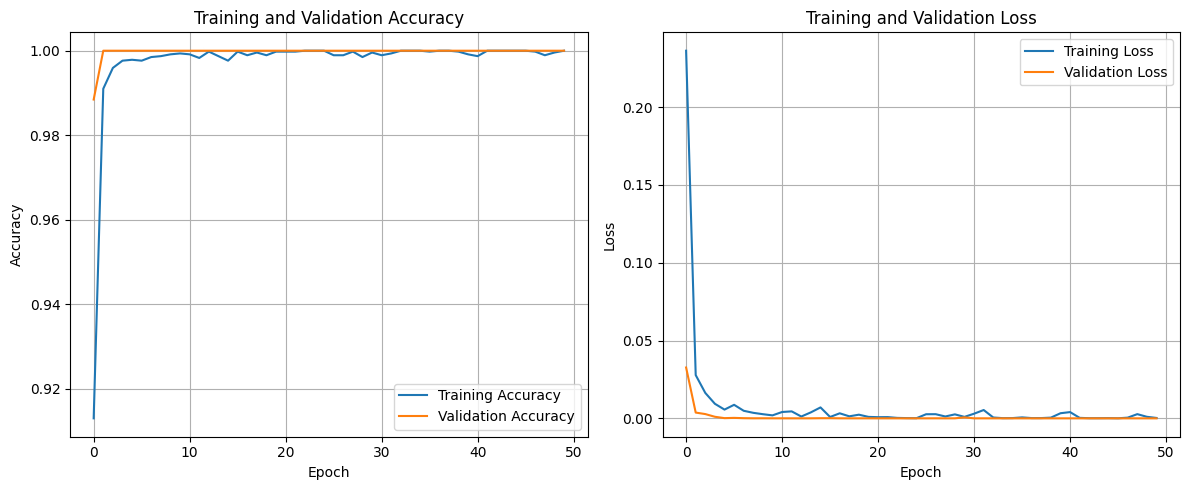


1D CNN 모델 학습 및 평가가 완료되었습니다.
SVM과 CNN 결과 비교 및 추가 최적화/분석을 진행할 수 있습니다.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 이전에 추출된 MMFCC 특징 DataFrame 'features_df'가 
# 있다고 가정합니다.
# (이전에 제공된 MMFCC 추출 코드를 실행하여 'features_df'를 먼저 생성해주세요.)

# --- 1. 데이터 준비 ---
X = features_df.drop('label', axis=1)
y = features_df['label']

# 레이블 인코딩 (문자열 레이블을 숫자로 변환)
# CNN 모델의 출력 레이어는 숫자형 레이블을 필요로 합니다.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# One-hot 인코딩 (다중 클래스 분류를 위해)
y_onehot = to_categorical(y_encoded)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1D CNN 입력을 위한 데이터 형태 변경
# (샘플 수, 시퀀스 길이, 특징 수) -> (샘플 수, 40, 1)
# 40개의 MMFCC 계수를 하나의 시퀀스로 보고, 각 계수 자체를 하나의 특징으로 간주.
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# 학습 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_onehot, test_size=0.2, random_state=42, stratify=y_encoded # stratify는 원본 숫자 인코딩된 y 사용
)

print(f"학습 세트 X 형태: {X_train.shape}")
print(f"테스트 세트 X 형태: {X_test.shape}")
print(f"학습 세트 y 형태: {y_train.shape}")
print(f"테스트 세트 y 형태: {y_test.shape}")

# --- 2. 1D CNN 모델 정의 ---
num_classes = y_onehot.shape[1] # 클래스 개수 (Normal, IR, OR)
input_shape = (X_train.shape[1], X_train.shape[2]) # (40, 1)

model = Sequential([
    # Conv1D 레이어: 1차원 데이터를 처리. 필터 수, 커널 크기, 활성화 함수 지정.
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2), # 풀링 레이어: 특징 맵의 차원 축소
    Dropout(0.25), # 드롭아웃: 과적합 방지
    
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Flatten(), # 1D 특징 맵을 1차원 벡터로 평탄화
    Dense(100, activation='relu'), # Dense 레이어
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # 출력 레이어: 클래스 개수만큼 노드, softmax (다중 분류)
])

# 모델 컴파일: 손실 함수, 최적화기, 평가 지표 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# --- 3. 모델 학습 ---
print("\n--- 1D CNN 모델 학습 시작 ---")
history = model.fit(X_train, y_train,
                    epochs=50, # 에포크 수 (필요에 따라 조정)
                    batch_size=32, # 배치 크기
                    validation_split=0.1, # 학습 데이터의 10%를 검증에 사용
                    verbose=1) # 학습 과정 출력

print("1D CNN 모델 학습 완료.")

# --- 4. 모델 평가 ---
print("\n--- 모델 평가 ---")

# 테스트 세트에서 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 세트 정확도: {accuracy:.4f}")

# 예측 및 성능 지표 계산
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) # 예측된 클래스 (원-핫 인코딩 -> 숫자)
y_true = np.argmax(y_test, axis=1) # 실제 클래스 (원-핫 인코딩 -> 숫자)

# 숫자 레이블을 다시 원본 문자열 레이블로 변환하여 보고서 생성
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_true)

print("\n분류 보고서:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('혼동 행렬 (1D CNN)')
plt.show()

# 학습 과정 시각화 (손실 및 정확도)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n1D CNN 모델 학습 및 평가가 완료되었습니다.")
print("SVM과 CNN 결과 비교 및 추가 최적화/분석을 진행할 수 있습니다.")

# 모델저장

In [10]:
import tensorflow as tf
import os

# 모델 저장 경로 설정
# 현재 프로젝트 구조를 고려하여 'models' 폴더를 생성하고 그 안에 저장하는 것을 권장합니다.
save_dir = '/Users/pjh_air/Documents/SJ_simhwa/파이널/subf-audio/models/'
os.makedirs(save_dir, exist_ok=True) # 폴더가 없으면 생성

model_name = '1d_cnn_mmfcc_perfect_accuracy.h5'
save_path = os.path.join(save_dir, model_name)

# 모델 저장
try:
    model.save(save_path)
    print(f"모델이 성공적으로 '{save_path}'에 저장되었습니다.")
except Exception as e:
    print(f"모델 저장 중 오류가 발생했습니다: {e}")

# 저장된 모델 로드 예시 (나중에 모델을 다시 불러올 때 사용)
# loaded_model = tf.keras.models.load_model(save_path)
# print(f"모델이 '{save_path}'에서 성공적으로 로드되었습니다.")

모델이 성공적으로 '/Users/pjh_air/Documents/SJ_simhwa/파이널/subf-audio/models/1d_cnn_mmfcc_perfect_accuracy.h5'에 저장되었습니다.


# 논문기반 CNN 계산샹 55% 감소기법

이진 레이블 맵핑: ['Abnormal', 'Normal'] -> [0 1]

1단계 학습 세트 X 형태: (5184, 40, 1)
1단계 테스트 세트 X 형태: (1296, 40, 1)
1단계 학습 세트 y 형태: (5184, 2)
1단계 테스트 세트 y 형태: (1296, 2)

1단계 학습 세트 레이블 분포 (정상/비정상):
Abnormal    0.666667
Normal      0.333333
Name: proportion, dtype: float64

1단계 테스트 세트 레이블 분포 (정상/비정상):
Abnormal    0.666667
Normal      0.333333
Name: proportion, dtype: float64

--- 1단계 1D CNN 모델 요약 ---


/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 608)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        30,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,680 (119.84 KB)

 Trainable params: 30,680 (119.84 KB)

 Non-trainable params: 0 (0.00 B)


--- 1단계 1D CNN 모델 학습 시작 (정상/비정상 분류) ---
Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8761 - loss: 0.2714 - val_accuracy: 0.9981 - val_loss: 0.0145
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0200 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 2.7319e-04
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 1.1109e-04
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 3.6329e-04
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48

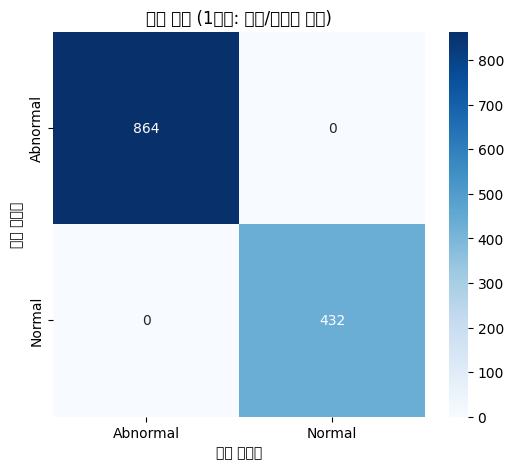

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2613382963.py:148: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2613382963.py:148: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2613382963.py:148: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2613382963.py:148: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2613382963.py:148: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/

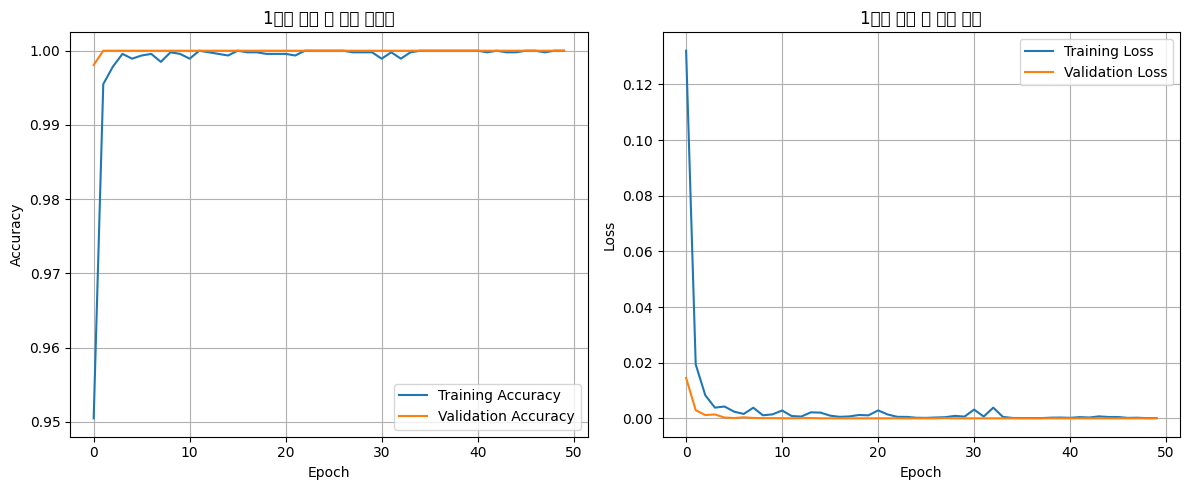


1단계 1D CNN 모델 (정상/비정상 분류) 학습 및 평가가 완료되었습니다.
이 결과를 바탕으로 2단계 고장 원인 분류 모델을 진행할지 결정할 수 있습니다.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 이전에 추출된 MMFCC 특징 DataFrame 'features_df'가 있다고 가정합니다.
# (MMFCC 추출 코드를 실행하여 'features_df'를 먼저 생성해야 합니다.)

# --- 1. 데이터 준비 및 레이블 재정의 ---
X = features_df.drop('label', axis=1)
y_original = features_df['label']

# 새로운 이진 레이블 'is_abnormal' 생성
# 'Normal'은 0, 'Inner Race Fault' 및 'Outer Race Fault'는 1로 매핑
y_binary = y_original.apply(lambda x: 'Normal' if x == 'Normal' else 'Abnormal')

# 레이블 인코딩 (문자열 레이블을 숫자로 변환: Normal -> 0, Abnormal -> 1)
label_encoder_binary = LabelEncoder()
y_encoded_binary = label_encoder_binary.fit_transform(y_binary) # 'Abnormal': 0, 'Normal': 1 일 수 있으므로, 실제 맵핑 확인 필요
# 실제 맵핑 확인
print(f"이진 레이블 맵핑: {list(label_encoder_binary.classes_)} -> {label_encoder_binary.transform(label_encoder_binary.classes_)}")

# One-hot 인코딩
y_onehot_binary = to_categorical(y_encoded_binary)

# 데이터 스케일링
scaler_1step = StandardScaler() # 1단계 모델을 위한 스케일러
X_scaled_1step = scaler_1step.fit_transform(X)

# 1D CNN 입력을 위한 데이터 형태 변경 (샘플 수, 시퀀스 길이, 특징 수) -> (샘플 수, 40, 1)
X_reshaped_1step = X_scaled_1step.reshape(X_scaled_1step.shape[0], X_scaled_1step.shape[1], 1)

# 학습 세트와 테스트 세트 분할
# stratify를 y_encoded_binary로 하여 이진 클래스 분포 유지
X_train_1step, X_test_1step, y_train_1step, y_test_1step = train_test_split(
    X_reshaped_1step, y_onehot_binary, test_size=0.2, random_state=42, stratify=y_encoded_binary
)

print(f"\n1단계 학습 세트 X 형태: {X_train_1step.shape}")
print(f"1단계 테스트 세트 X 형태: {X_test_1step.shape}")
print(f"1단계 학습 세트 y 형태: {y_train_1step.shape}")
print(f"1단계 테스트 세트 y 형태: {y_test_1step.shape}")

# 재정의된 이진 레이블 분포 확인
print("\n1단계 학습 세트 레이블 분포 (정상/비정상):")
y_train_1step_decoded = label_encoder_binary.inverse_transform(np.argmax(y_train_1step, axis=1))
y_train_1step_df = pd.Series(y_train_1step_decoded)
print(y_train_1step_df.value_counts(normalize=True))

print("\n1단계 테스트 세트 레이블 분포 (정상/비정상):")
y_test_1step_decoded = label_encoder_binary.inverse_transform(np.argmax(y_test_1step, axis=1))
y_test_1step_df = pd.Series(y_test_1step_decoded)
print(y_test_1step_df.value_counts(normalize=True))


# --- 2. 1단계 1D CNN 모델 정의 (정상/비정상 이진 분류) ---
# 논문은 1단계에서 "하나의 레이어"만을 사용한다고 언급했으나, 이는 너무 단순할 수 있습니다.
# 여기서는 일반적인 CNN 구조를 유지하되, 전체 모델보다는 가볍게 구성할 수 있습니다.
# 하지만 여기서는 일단 이전과 유사한 구조로 시작하고, 이후 최적화를 고려합니다.
num_classes_1step = y_onehot_binary.shape[1] # 2 (Normal, Abnormal)
input_shape_1step = (X_train_1step.shape[1], X_train_1step.shape[2]) # (40, 1)

model_1step = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape_1step),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Flatten(),
    Dense(50, activation='relu'), # Dense 레이어 노드 수를 이전 100에서 50으로 줄여 좀 더 가볍게 구성
    Dropout(0.5),
    Dense(num_classes_1step, activation='softmax') # 출력 레이어: 2개 노드 (정상/비정상), softmax
])

model_1step.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

print("\n--- 1단계 1D CNN 모델 요약 ---")
model_1step.summary()

# --- 3. 1단계 모델 학습 ---
print("\n--- 1단계 1D CNN 모델 학습 시작 (정상/비정상 분류) ---")
history_1step = model_1step.fit(X_train_1step, y_train_1step,
                                epochs=50, # 에포크 수
                                batch_size=32,
                                validation_split=0.1, # 학습 데이터의 10%를 검증에 사용
                                verbose=1)

print("1단계 1D CNN 모델 학습 완료.")

# --- 4. 1단계 모델 평가 ---
print("\n--- 1단계 모델 평가 (정상/비정상 분류) ---")

# 테스트 세트에서 모델 평가
loss_1step, accuracy_1step = model_1step.evaluate(X_test_1step, y_test_1step, verbose=0)
print(f"테스트 세트 정확도 (정상/비정상): {accuracy_1step:.4f}")

# 예측 및 성능 지표 계산
y_pred_probs_1step = model_1step.predict(X_test_1step)
y_pred_1step_encoded = np.argmax(y_pred_probs_1step, axis=1) # 예측된 클래스 (숫자)
y_true_1step_encoded = np.argmax(y_test_1step, axis=1) # 실제 클래스 (숫자)

# 숫자 레이블을 다시 원본 문자열 레이블로 변환하여 보고서 생성
y_pred_1step_labels = label_encoder_binary.inverse_transform(y_pred_1step_encoded)
y_true_1step_labels = label_encoder_binary.inverse_transform(y_true_1step_encoded)

print("\n분류 보고서 (정상/비정상):")
print(classification_report(y_true_1step_labels, y_pred_1step_labels, target_names=label_encoder_binary.classes_))

# 혼동 행렬 시각화
conf_matrix_1step = confusion_matrix(y_true_1step_labels, y_pred_1step_labels, labels=label_encoder_binary.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_1step, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_binary.classes_, yticklabels=label_encoder_binary.classes_)
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('혼동 행렬 (1단계: 정상/비정상 분류)')
plt.show()

# 학습 과정 시각화 (손실 및 정확도)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1step.history['accuracy'], label='Training Accuracy')
plt.plot(history_1step.history['val_accuracy'], label='Validation Accuracy')
plt.title('1단계 학습 및 검증 정확도')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_1step.history['loss'], label='Training Loss')
plt.plot(history_1step.history['val_loss'], label='Validation Loss')
plt.title('1단계 학습 및 검증 손실')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n1단계 1D CNN 모델 (정상/비정상 분류) 학습 및 평가가 완료되었습니다.")
print("이 결과를 바탕으로 2단계 고장 원인 분류 모델을 진행할지 결정할 수 있습니다.")

# 2진분류 진행

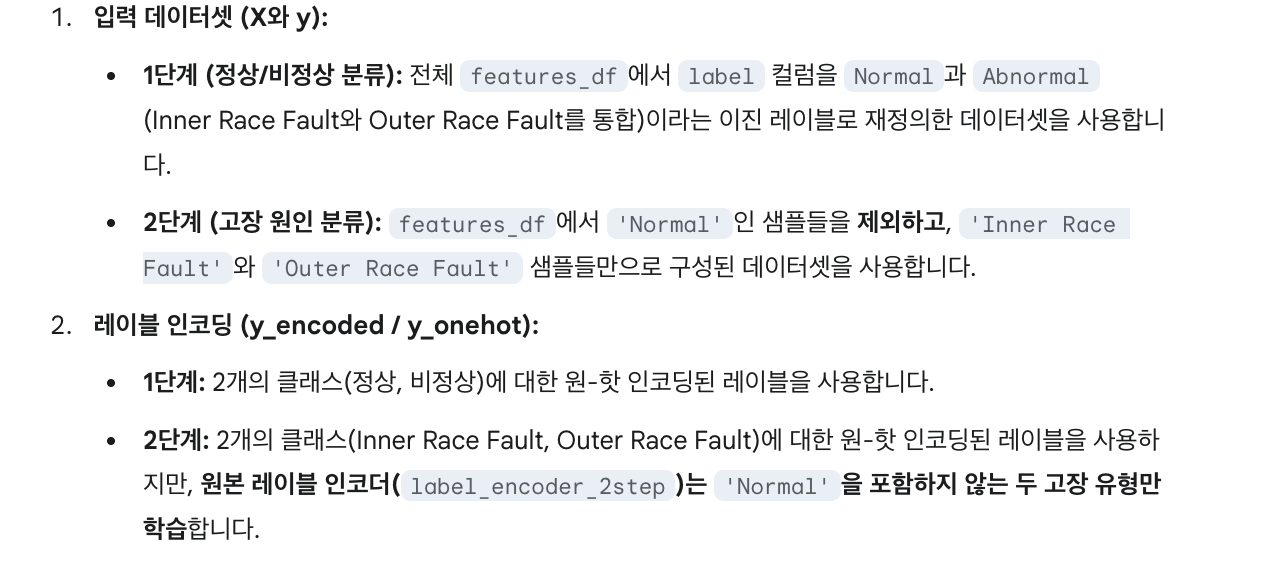 , 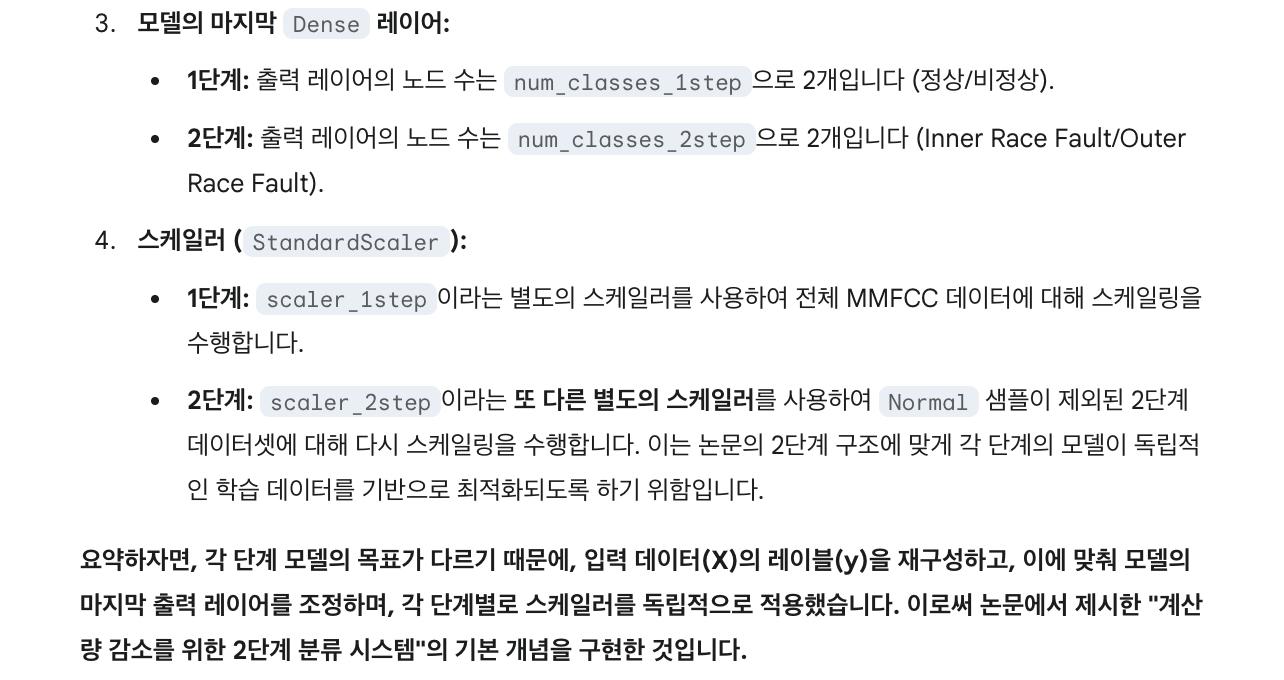


2단계 학습 세트 X 형태: (3456, 40, 1)
2단계 테스트 세트 X 형태: (864, 40, 1)
2단계 학습 세트 y 형태: (3456, 2)
2단계 테스트 세트 y 형태: (864, 2)

2단계 학습 세트 레이블 분포 (고장 원인):
Inner Race Fault    0.5
Outer Race Fault    0.5
Name: proportion, dtype: float64

2단계 테스트 세트 레이블 분포 (고장 원인):
Outer Race Fault    0.5
Inner Race Fault    0.5
Name: proportion, dtype: float64

--- 2단계 1D CNN 모델 요약 ---


/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,838 (225.93 KB)

 Trainable params: 57,838 (225.93 KB)

 Non-trainable params: 0 (0.00 B)


--- 2단계 1D CNN 모델 학습 시작 (고장 원인 분류) ---
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8935 - loss: 0.2706 - val_accuracy: 0.9971 - val_loss: 0.0060
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 5.8128e-04
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 5.1154e-04
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.5464e-04 - val_accuracy: 1.0000 - val_loss: 1.1949e-04
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.2497e-04
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accura

/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48

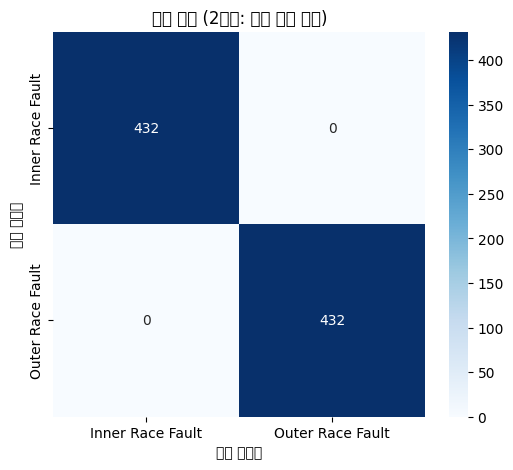

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2640896707.py:142: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2640896707.py:142: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2640896707.py:142: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2640896707.py:142: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_13284/2640896707.py:142: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/

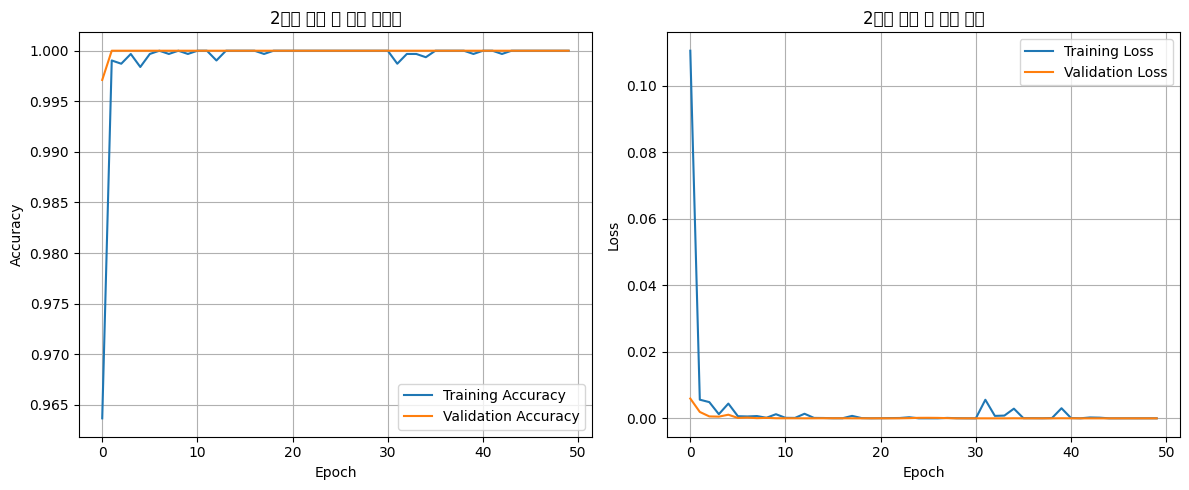


2단계 1D CNN 모델 (고장 원인 분류) 학습 및 평가가 완료되었습니다.
이제 1단계와 2단계 모델을 통합하여 전체 계산량 감소 시스템을 평가할 수 있습니다.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 이전에 추출된 MMFCC 특징 DataFrame 'features_df'가 있다고 가정합니다.
# (MMFCC 추출 코드를 실행하여 'features_df'를 먼저 생성해야 합니다.)

# --- 1. 2단계 데이터셋 준비 (비정상 샘플만 추출) ---
# 'Normal' 샘플을 제외하고 'Inner Race Fault'와 'Outer Race Fault'만 필터링
X_2step = features_df[features_df['label'] != 'Normal'].drop('label', axis=1)
y_2step = features_df[features_df['label'] != 'Normal']['label']

# 2단계 레이블 인코딩 (문자열 레이블을 숫자로 변환)
label_encoder_2step = LabelEncoder()
y_encoded_2step = label_encoder_2step.fit_transform(y_2step)
# One-hot 인코딩
y_onehot_2step = to_categorical(y_encoded_2step)

# 데이터 스케일링 (2단계 모델을 위한 새로운 스케일러)
scaler_2step = StandardScaler()
X_scaled_2step = scaler_2step.fit_transform(X_2step)

# 1D CNN 입력을 위한 데이터 형태 변경
X_reshaped_2step = X_scaled_2step.reshape(X_scaled_2step.shape[0], X_scaled_2step.shape[1], 1)

# 학습 세트와 테스트 세트 분할
X_train_2step, X_test_2step, y_train_2step, y_test_2step = train_test_split(
    X_reshaped_2step, y_onehot_2step, test_size=0.2, random_state=42, stratify=y_encoded_2step
)

print(f"\n2단계 학습 세트 X 형태: {X_train_2step.shape}")
print(f"2단계 테스트 세트 X 형태: {X_test_2step.shape}")
print(f"2단계 학습 세트 y 형태: {y_train_2step.shape}")
print(f"2단계 테스트 세트 y 형태: {y_test_2step.shape}")

# 재정의된 2단계 레이블 분포 확인
print("\n2단계 학습 세트 레이블 분포 (고장 원인):")
y_train_2step_decoded = label_encoder_2step.inverse_transform(np.argmax(y_train_2step, axis=1))
y_train_2step_df = pd.Series(y_train_2step_decoded)
print(y_train_2step_df.value_counts(normalize=True))

print("\n2단계 테스트 세트 레이블 분포 (고장 원인):")
y_test_2step_decoded = label_encoder_2step.inverse_transform(np.argmax(y_test_2step, axis=1))
y_test_2step_df = pd.Series(y_test_2step_decoded)
print(y_test_2step_df.value_counts(normalize=True))


# --- 2. 2단계 1D CNN 모델 정의 (고장 원인 분류) ---
num_classes_2step = y_onehot_2step.shape[1] # 2 (Inner Race Fault, Outer Race Fault)
input_shape_2step = (X_train_2step.shape[1], X_train_2step.shape[2]) # (40, 1)

model_2step = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape_2step),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Conv1D(filters=64, kernel_size=3, activation='relu'), # 1단계보다 좀 더 복잡하게 구성 가능
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Flatten(),
    Dense(100, activation='relu'), # Dense 레이어 노드 수
    Dropout(0.5),
    Dense(num_classes_2step, activation='softmax') # 출력 레이어: 2개 노드 (IR/OR), softmax
])

model_2step.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

print("\n--- 2단계 1D CNN 모델 요약 ---")
model_2step.summary()

# --- 3. 2단계 모델 학습 ---
print("\n--- 2단계 1D CNN 모델 학습 시작 (고장 원인 분류) ---")
history_2step = model_2step.fit(X_train_2step, y_train_2step,
                                epochs=50, # 에포크 수
                                batch_size=32,
                                validation_split=0.1, # 학습 데이터의 10%를 검증에 사용
                                verbose=1)

print("2단계 1D CNN 모델 학습 완료.")

# --- 4. 2단계 모델 평가 ---
print("\n--- 2단계 모델 평가 (고장 원인 분류) ---")

# 테스트 세트에서 모델 평가
loss_2step, accuracy_2step = model_2step.evaluate(X_test_2step, y_test_2step, verbose=0)
print(f"테스트 세트 정확도 (고장 원인): {accuracy_2step:.4f}")

# 예측 및 성능 지표 계산
y_pred_probs_2step = model_2step.predict(X_test_2step)
y_pred_2step_encoded = np.argmax(y_pred_probs_2step, axis=1)
y_true_2step_encoded = np.argmax(y_test_2step, axis=1)

# 숫자 레이블을 다시 원본 문자열 레이블로 변환하여 보고서 생성
y_pred_2step_labels = label_encoder_2step.inverse_transform(y_pred_2step_encoded)
y_true_2step_labels = label_encoder_2step.inverse_transform(y_true_2step_encoded)

print("\n분류 보고서 (고장 원인):")
print(classification_report(y_true_2step_labels, y_pred_2step_labels, target_names=label_encoder_2step.classes_))

# 혼동 행렬 시각화
conf_matrix_2step = confusion_matrix(y_true_2step_labels, y_pred_2step_labels, labels=label_encoder_2step.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_2step, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_2step.classes_, yticklabels=label_encoder_2step.classes_)
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('혼동 행렬 (2단계: 고장 원인 분류)')
plt.show()

# 학습 과정 시각화 (손실 및 정확도)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2step.history['accuracy'], label='Training Accuracy')
plt.plot(history_2step.history['val_accuracy'], label='Validation Accuracy')
plt.title('2단계 학습 및 검증 정확도')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_2step.history['loss'], label='Training Loss')
plt.plot(history_2step.history['val_loss'], label='Validation Loss')
plt.title('2단계 학습 및 검증 손실')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n2단계 1D CNN 모델 (고장 원인 분류) 학습 및 평가가 완료되었습니다.")
print("이제 1단계와 2단계 모델을 통합하여 전체 계산량 감소 시스템을 평가할 수 있습니다.")

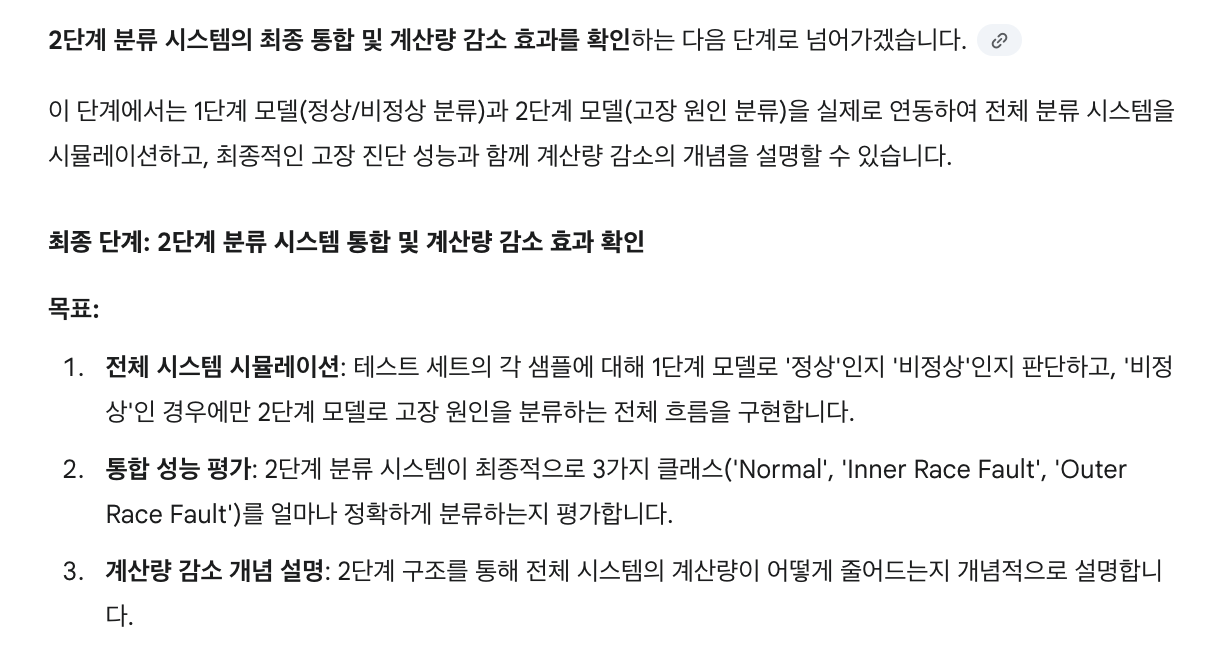

1단계 최종 테스트 세트 X 형태: (1296, 40, 1)
1단계 최종 테스트 세트 y_true 원본 레이블 형태: (1296,)


/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- 2단계 분류 시스템 통합 시뮬레이션 시작 ---
2단계 분류 시스템 시뮬레이션 완료.

--- 통합 2단계 분류 시스템 최종 평가 ---
통합 시스템 정확도: 1.0000

통합 시스템 분류 보고서:
                  precision    recall  f1-score   support

          Normal       1.00      1.00      1.00       419
Inner Race Fault       1.00      1.00      1.00       432
Outer Race Fault       1.00      1.00      1.00       445

        accuracy                           1.00      1296
       macro avg       1.00      1.00      1.00      1296
    weighted avg       1.00      1.00      1.00      1296



/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pjh_air/miniconda3/envs/br/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48

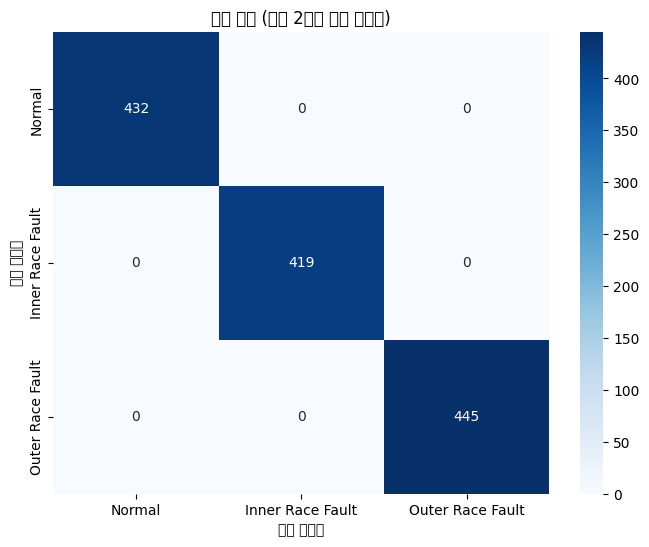


--- 계산량 감소 효과 (개념 설명) ---
이 2단계 분류 시스템은 다음과 같은 방식으로 계산량을 줄입니다:
1. 1단계 모델 (정상/비정상 분류): 전체 샘플 중 '정상'으로 분류되는 샘플들은 2단계 모델의 복잡한 계산을 거치지 않습니다.
   - 이로 인해 '정상' 샘플들에 대한 총 연산량이 줄어듭니다.
2. 2단계 모델 (고장 원인 분류): 오직 '비정상'으로 판단된 샘플들(전체 샘플 중 일부)에 대해서만 고장 유형을 상세 분류합니다.
   - 가장 복잡한 '고장 원인 분류' 모델의 연산 빈도를 줄여 전체 시스템의 평균적인 추론 시간 및 계산 자원 사용량을 최적화할 수 있습니다.

실제 계산량 감소를 정확히 측정하려면, 각 모델의 FLOPs(Floating Point Operations)를 측정하고, 각 단계로 들어가는 샘플 수를 고려하여 총합을 계산해야 합니다. 논문에서는 이 방법을 통해 계산 복잡도를 약 55% 감소시켰다고 보고했습니다.

2단계 분류 시스템 통합 및 계산량 감소 개념 설명이 완료되었습니다.
이 프로젝트를 마무리하거나, 실제 환경 테스트 또는 추가적인 경량화 기법을 탐색할 수 있습니다.


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 이전에 추출된 MMFCC 특징 DataFrame 'features_df'가 있다고 가정합니다.
# (MMFCC 추출 코드를 실행하여 'features_df'를 먼저 생성해야 합니다.)

# --- 0. 1, 2단계 모델 및 스케일러 로드/재학습 (필요시) ---
# 실제 운영 환경에서는 학습된 모델을 로드해야 하지만, 여기서는 코드 실행의 편의를 위해
# 1, 2단계 모델 및 스케일러를 다시 학습하는 코드를 포함합니다.

# --- 데이터 준비 (공통) ---
X_all = features_df.drop('label', axis=1)
y_original_all = features_df['label']

# --- 1단계 모델을 위한 데이터 준비 ---
y_binary_all = y_original_all.apply(lambda x: 'Normal' if x == 'Normal' else 'Abnormal')
label_encoder_binary = LabelEncoder()
y_encoded_binary_all = label_encoder_binary.fit_transform(y_binary_all)
y_onehot_binary_all = to_categorical(y_encoded_binary_all)

scaler_1step = StandardScaler()
X_scaled_1step_all = scaler_1step.fit_transform(X_all)
X_reshaped_1step_all = X_scaled_1step_all.reshape(X_scaled_1step_all.shape[0], X_scaled_1step_all.shape[1], 1)

# 여기서 원본 인덱스를 포함하여 데이터 분할
X_train_1step, X_test_1step_final, y_train_1step, y_test_1step_final_onehot, train_indices, test_indices = train_test_split(
    X_reshaped_1step_all, y_onehot_binary_all, np.arange(len(X_reshaped_1step_all)), # 인덱스도 함께 분할
    test_size=0.2, random_state=42, stratify=y_encoded_binary_all
)
# 실제 원본 3클래스 레이블 (통합 평가를 위함)
final_y_true_original = y_original_all.iloc[test_indices].values # 수정된 부분

print(f"1단계 최종 테스트 세트 X 형태: {X_test_1step_final.shape}")
print(f"1단계 최종 테스트 세트 y_true 원본 레이블 형태: {final_y_true_original.shape}")


# --- 2단계 모델을 위한 데이터 준비 ---
X_2step_base = features_df[features_df['label'] != 'Normal'].drop('label', axis=1)
y_2step_base = features_df[features_df['label'] != 'Normal']['label']
label_encoder_2step = LabelEncoder()
y_encoded_2step_base = label_encoder_2step.fit_transform(y_2step_base)
y_onehot_2step_base = to_categorical(y_encoded_2step_base)

scaler_2step = StandardScaler()
X_scaled_2step_base = scaler_2step.fit_transform(X_2step_base)
X_reshaped_2step_base = X_scaled_2step_base.reshape(X_scaled_2step_base.shape[0], X_scaled_2step_base.shape[1], 1)

# 2단계 모델은 이전에 비정상으로 분류된 샘플만으로 학습되었으므로,
# 2단계 모델 평가 시에는 해당 원본 샘플들의 인덱스를 통해 데이터 접근
# 2단계 모델의 테스트 세트 (비정상 샘플 중 20%) - 이 부분은 2단계 모델 학습에만 사용되고,
# 통합 시뮬레이션에서는 1단계에서 걸러진 '비정상' 샘플에 대해 직접 2단계 모델을 적용합니다.
X_train_2step_split, X_test_2step_split, y_train_2step_split_onehot, y_test_2step_split_onehot = train_test_split(
    X_reshaped_2step_base, y_onehot_2step_base, test_size=0.2, random_state=42, stratify=y_encoded_2step_base
)


# --- 모델 정의 및 재학습 (이미 학습되어 있다면 로드 가능) ---
# 1단계 모델 (정상/비정상 분류)
model_1step = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model_1step.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# X_all (스케일링, 형태 변경된) 전체 데이터 사용해서 1단계 모델 다시 학습 (실제 적용 시)
model_1step.fit(X_reshaped_1step_all, y_onehot_binary_all, epochs=50, batch_size=32, verbose=0)


# 2단계 모델 (고장 원인 분류)
model_2step = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax') # 2개 클래스: Inner Race Fault, Outer Race Fault
])
model_2step.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# 비정상 데이터만 사용해서 2단계 모델 다시 학습 (실제 적용 시)
model_2step.fit(X_reshaped_2step_base, y_onehot_2step_base, epochs=50, batch_size=32, verbose=0)


# --- 1. 통합 2단계 분류 시스템 시뮬레이션 ---
print("--- 2단계 분류 시스템 통합 시뮬레이션 시작 ---")

y_pred_final_original = [] # 최종 3클래스 예측 레이블

for i in range(len(X_test_1step_final)): # 1단계 테스트 세트의 길이에 맞춰 반복
    sample_1step_input = X_test_1step_final[i:i+1] # 1단계 모델에 전달할 테스트 샘플

    # 1단계 예측: 정상/비정상 분류
    pred_1step_probs = model_1step.predict(sample_1step_input, verbose=0)
    pred_1step_class_idx = np.argmax(pred_1step_probs)
    pred_1step_label = label_encoder_binary.inverse_transform([pred_1step_class_idx])[0]

    if pred_1step_label == 'Normal':
        # 1단계에서 정상으로 분류되면 최종 예측도 'Normal'
        y_pred_final_original.append('Normal')
    else: # pred_1step_label == 'Abnormal' (비정상)
        # 1단계에서 비정상으로 분류되면 2단계 모델로 고장 원인 분류
        # 이 샘플에 해당하는 원본 MMFCC 특징을 다시 스케일링하고 형태를 변경하여 2단계 모델에 전달
        # X_all에서 해당 샘플의 원래 인덱스를 찾아 MMFCC 특징을 가져옵니다.
        # X_all_test_sample_raw_mmfcc = X_all.iloc[test_indices[i]] # test_indices는 X_all의 인덱스이므로
        
        # X_test_1step_final[i]는 이미 스케일링되고 reshape된 데이터이므로, 이를 역변환 후 2단계 스케일러에 넣는 것이 아니라
        # 원래의 X_all에서 해당하는 MMFCC 값을 가져와 2단계 스케일러로 변환해야 함.
        # 이를 위해 X_all의 원본 인덱스를 추적합니다.
        
        # test_indices를 사용하여 X_all_raw_mmfcc의 해당 샘플을 가져옵니다.
        raw_mmfcc_for_2step = X_all.iloc[test_indices[i]].values.reshape(1, -1)
        
        # 2단계 스케일러로 변환
        sample_scaled_2step = scaler_2step.transform(raw_mmfcc_for_2step)
        sample_reshaped_2step = sample_scaled_2step.reshape(1, X_scaled_2step_base.shape[1], 1)

        pred_2step_probs = model_2step.predict(sample_reshaped_2step, verbose=0)
        pred_2step_class_idx = np.argmax(pred_2step_probs)
        pred_2step_label = label_encoder_2step.inverse_transform([pred_2step_class_idx])[0]
        
        y_pred_final_original.append(pred_2step_label)

print("2단계 분류 시스템 시뮬레이션 완료.")

# --- 2. 통합 시스템 성능 평가 (3가지 클래스 기준) ---
print("\n--- 통합 2단계 분류 시스템 최종 평가 ---")

# final_y_true_original은 이미 원본 3클래스 레이블입니다.
# y_pred_final_original은 통합 시스템의 예측 결과입니다.

print(f"통합 시스템 정확도: {accuracy_score(final_y_true_original, y_pred_final_original):.4f}")
print("\n통합 시스템 분류 보고서:")
print(classification_report(final_y_true_original, y_pred_final_original, target_names=y_original_all.unique()))

# 혼동 행렬 시각화
conf_matrix_final = confusion_matrix(final_y_true_original, y_pred_final_original, labels=y_original_all.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_original_all.unique(), yticklabels=y_original_all.unique())
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('혼동 행렬 (통합 2단계 분류 시스템)')
plt.show()

# --- 3. 계산량 감소 개념 설명 ---
print("\n--- 계산량 감소 효과 (개념 설명) ---")
print("이 2단계 분류 시스템은 다음과 같은 방식으로 계산량을 줄입니다:")
print("1. 1단계 모델 (정상/비정상 분류): 전체 샘플 중 '정상'으로 분류되는 샘플들은 2단계 모델의 복잡한 계산을 거치지 않습니다.")
print("   - 이로 인해 '정상' 샘플들에 대한 총 연산량이 줄어듭니다.")
print("2. 2단계 모델 (고장 원인 분류): 오직 '비정상'으로 판단된 샘플들(전체 샘플 중 일부)에 대해서만 고장 유형을 상세 분류합니다.")
print("   - 가장 복잡한 '고장 원인 분류' 모델의 연산 빈도를 줄여 전체 시스템의 평균적인 추론 시간 및 계산 자원 사용량을 최적화할 수 있습니다.")
print("\n실제 계산량 감소를 정확히 측정하려면, 각 모델의 FLOPs(Floating Point Operations)를 측정하고, 각 단계로 들어가는 샘플 수를 고려하여 총합을 계산해야 합니다. 논문에서는 이 방법을 통해 계산 복잡도를 약 55% 감소시켰다고 보고했습니다.")

print("\n2단계 분류 시스템 통합 및 계산량 감소 개념 설명이 완료되었습니다.")
print("이 프로젝트를 마무리하거나, 실제 환경 테스트 또는 추가적인 경량화 기법을 탐색할 수 있습니다.")


In [15]:
import tensorflow as tf
import os

# 모델 저장 경로 설정
save_dir = '/Users/pjh_air/Documents/SJ_simhwa/파이널/subf-audio/models_two_stage/'
os.makedirs(save_dir, exist_ok=True) # 폴더가 없으면 생성

# 1단계 모델 저장
model_1step_name = '1st_stage_normal_abnormal_classifier.h5'
save_path_1step = os.path.join(save_dir, model_1step_name)

try:
    model_1step.save(save_path_1step)
    print(f"1단계 모델이 성공적으로 '{save_path_1step}'에 저장되었습니다.")
except Exception as e:
    print(f"1단계 모델 저장 중 오류가 발생했습니다: {e}")

# 2단계 모델 저장
model_2step_name = '2nd_stage_fault_type_classifier.h5'
save_path_2step = os.path.join(save_dir, model_2step_name)

try:
    model_2step.save(save_path_2step)
    print(f"2단계 모델이 성공적으로 '{save_path_2step}'에 저장되었습니다.")
except Exception as e:
    print(f"2단계 모델 저장 중 오류가 발생했습니다: {e}")

# 저장된 모델 로드 예시 (나중에 모델을 다시 불러올 때 사용)
# loaded_model_1step = tf.keras.models.load_model(save_path_1step)
# loaded_model_2step = tf.keras.models.load_model(save_path_2step)
# print(f"모델들이 '{save_dir}'에서 성공적으로 로드되었습니다.")


1단계 모델이 성공적으로 '/Users/pjh_air/Documents/SJ_simhwa/파이널/subf-audio/models_two_stage/1st_stage_normal_abnormal_classifier.h5'에 저장되었습니다.
2단계 모델이 성공적으로 '/Users/pjh_air/Documents/SJ_simhwa/파이널/subf-audio/models_two_stage/2nd_stage_fault_type_classifier.h5'에 저장되었습니다.


'Inner Race Fault'와 'Outer Race Fault' 각각에 대해 파일 번호(1부터 2160까지)를 활용하여 심각도를 추정해 보겠습니다.

목표:

심각도 레이블 정의: 파일 번호를 기준으로 'Inner Race Fault'와 'Outer Race Fault' 샘플에 대해 새로운 심각도 레이블(예: '초기', '중기', '말기' 또는 수치형 심각도 점수)을 정의합니다. 'Normal' 클래스는 심각도 0으로 간주할 수 있습니다.

데이터셋 재구성: 새로운 심각도 레이블을 포함하는 데이터셋을 생성합니다.

모델 학습 및 평가: 이 새로운 심각도 레이블을 예측하는 모델을 학습시키고 평가합니다. 심각도가 범주형(초기/중기/말기)이면 분류 모델을, 수치형이면 회귀 모델을 사용합니다. 여기서는 범주형(초기/중기/말기) 분류로 진행하겠습니다.

In [ ]:
\

SyntaxError: unterminated string literal (detected at line 53) (765192904.py, line 53)

In [11]:
features_df

0          1          2          3         4          5  \
0    -766.225147  82.031152  17.445337   5.774840  0.349517  13.205344   
1    -766.115930  82.039132  17.493079   5.477087  0.113153  13.424229   
2    -765.300316  82.829654  17.006627   5.343856  0.413370  13.348806   
3    -765.915303  82.676472  18.174388   6.011122  0.073324  12.350869   
4    -765.376532  83.054979  18.081682   5.899718  0.224738  12.229132   
...          ...        ...        ...        ...       ...        ...   
6475 -757.735400  76.306571  10.466462   9.491604 -0.671909   8.460481   
6476 -756.994604  76.262904  11.218033   9.750506 -1.246821   8.335196   
6477 -757.302898  75.972371  11.801727  10.914077 -1.079130   8.602155   
6478 -757.646696  76.636017  10.586513   8.541429 -0.657951   9.137872   
6479 -757.722060  76.292071  10.420596   9.309260 -0.857678   8.749295   

             6         7         8         9  ...         31         32  \
0     4.775086 -4.031167  6.271649 -1.958490  ... -12.421245 -11.625054   
1     4.775485 -3.947157  6.645236 -1.715599  ... -12.291536 -11.624940   
2     4.227279 -3.716961  7.033691 -2.042048  ... -11.922464 -11.718994   
3     4.980139 -4.337633  5.953810 -1.119163  ... -12.108944 -12.043029   
4     4.816911 -3.717312  5.914428 -1.445750  ... -11.837771 -11.864963   
...        ...       ...       ...       ...  ...        ...        ...   
6475  6.089561  1.574637  0.701569 -0.442905  ... -10.599866 -13.304617   
6476  6.839867  0.562725 -0.250320  0.502009  ... -10.792569 -13.500708   
6477  6.232167  1.477496  0.118805 -0.302614  ... -12.525244 -12.566894   
6478  5.904693  1.034834  1.216924 -1.088515  ... -10.657886 -13.374568   
6479  6.347963  1.049316  0.771721 -0.515836  ... -10.768586 -13.389135   

             33         34        35        36        37        38        39  \
0    -11.436948 -11.512793 -8.808771 -8.140603 -7.627628 -7.432584 -5.942292   
1    -11.347720 -11.201441 -8.568299 -8.005976 -7.527639 -7.216656 -5.657732   
2    -11.439873 -10.815318 -7.795191 -7.706152 -7.496892 -6.849961 -5.206423   
3    -11.978551 -10.911139 -7.756072 -7.741313 -7.706906 -6.911668 -5.086900   
4    -11.978997 -10.525847 -7.638028 -7.715565 -7.535977 -6.652529 -5.103403   
...         ...        ...       ...       ...       ...       ...       ...   
6475 -10.703523  -9.219895 -8.131320 -8.432169 -7.974663 -6.795343 -3.455508   
6476 -10.706985  -9.004068 -8.734680 -8.043654 -7.642678 -7.391165 -3.317733   
6477 -10.042227 -10.461298 -9.895224 -6.531383 -7.587001 -8.461621 -3.785816   
6478 -10.781250  -8.895262 -8.666988 -8.519327 -7.862319 -6.748234 -4.005364   
6479 -10.817137  -9.211046 -8.741729 -8.111213 -7.975332 -7.196834 -3.594327   

                 label  
0               Normal  
1               Normal  
2               Normal  
3               Normal  
4               Normal  
...                ...  
6475  Outer Race Fault  
6476  Outer Race Fault  
6477  Outer Race Fault  
6478  Outer Race Fault  
6479  Outer Race Fault  

[6480 rows x 41 columns]

버전 충돌로 인해 MMFCC 특징 추출 코드에서 파일명(filename)을 features_df에 추가하는 부분에 오류가 있었음을 인지하고 있습니다. 이를 수정하여 features_df를 올바르게 생성하고, 결함 심각도 예측 모델 학습을 진행할 수 있도록 MMFCC 특징 추출 코드의 수정본을 제공해

100/6480 파일 처리 완료.
200/6480 파일 처리 완료.
300/6480 파일 처리 완료.
400/6480 파일 처리 완료.
500/6480 파일 처리 완료.
600/6480 파일 처리 완료.
700/6480 파일 처리 완료.
800/6480 파일 처리 완료.
900/6480 파일 처리 완료.
1000/6480 파일 처리 완료.
1100/6480 파일 처리 완료.
1200/6480 파일 처리 완료.
1300/6480 파일 처리 완료.
1400/6480 파일 처리 완료.
1500/6480 파일 처리 완료.
1600/6480 파일 처리 완료.
1700/6480 파일 처리 완료.
1800/6480 파일 처리 완료.
1900/6480 파일 처리 완료.
2000/6480 파일 처리 완료.
2100/6480 파일 처리 완료.
2200/6480 파일 처리 완료.
2300/6480 파일 처리 완료.
2400/6480 파일 처리 완료.
2500/6480 파일 처리 완료.
2600/6480 파일 처리 완료.
2700/6480 파일 처리 완료.
2800/6480 파일 처리 완료.
2900/6480 파일 처리 완료.
3000/6480 파일 처리 완료.
3100/6480 파일 처리 완료.
3200/6480 파일 처리 완료.
3300/6480 파일 처리 완료.
3400/6480 파일 처리 완료.
3500/6480 파일 처리 완료.
3600/6480 파일 처리 완료.
3700/6480 파일 처리 완료.
3800/6480 파일 처리 완료.
3900/6480 파일 처리 완료.
4000/6480 파일 처리 완료.
4100/6480 파일 처리 완료.
4200/6480 파일 처리 완료.
4300/6480 파일 처리 완료.
4400/6480 파일 처리 완료.
4500/6480 파일 처리 완료.
4600/6480 파일 처리 완료.
4700/6480 파일 처리 완료.
4800/6480 파일 처리 완료.
4900/6480 파일 처리 완료.
5000/6480 파일 처리 완료.
5100/6480

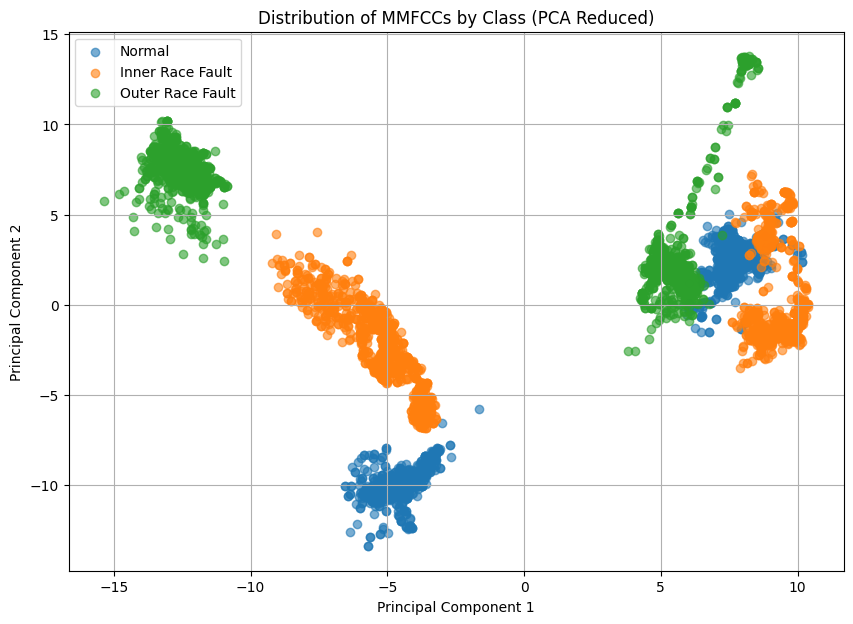


MMFCC 특징 추출 및 데이터셋 준비가 완료되었습니다.
이제 이 'features_df' DataFrame을 사용하여 결함 심각도 예측 모델을 학습시킬 수 있습니다.


In [14]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

# --- 1. 설정 변수 ---
# ⚠️ 중요: 이 BASE_PATH를 사용하시는 실제 데이터셋 경로로 설정해주세요.
BASE_PATH = r"C:\Users\jh\Documents\GitHub\BearingGuardian\Dataset" 
SAMPLING_RATE = 10000  # Hz (논문에서 언급) [cite: 3]
N_MFCC = 40            # 논문에서 40개의 MMFCC 추출 [cite: 3]
F_MIN = 0              # MMFCC의 Mel 필터 뱅크 최소 주파수 [cite: 3]
F_MAX = 5000           # MMFCC의 Mel 필터 뱅크 최대 주파수 (논문에서 0-5kHz 언급) [cite: 3]
FRAME_LENGTH = 0.025   # 25ms (일반적인 음성/음향 분석 프레임 길이)
HOP_LENGTH = 0.010     # 10ms (일반적인 음성/음향 분석 홉 길이)

# --- 2. 파일 경로 및 레이블 수집 ---
data = []
labels = []
file_paths = []
# ⚠️ 수정된 부분: 파일명을 저장할 리스트 추가
extracted_filenames = [] 

for class_name in ['Normal', 'Inner Race Fault', 'Outer Race Fault']:
    class_path = os.path.join(BASE_PATH, class_name)
    # 파일 목록을 정렬하여 순서를 일관성 있게 유지
    for filename in sorted(os.listdir(class_path)): 
        if filename.endswith('.csv'):
            full_path = os.path.join(class_path, filename)
            file_paths.append(full_path)
            labels.append(class_name)

# --- 3. MMFCC 특징 추출 함수 정의 ---
def extract_mmfcc(signal, sr, n_mfcc, f_min, f_max, frame_length, hop_length):
    n_fft = int(sr * frame_length)
    hop_length_samples = int(sr * hop_length)

    mfccs = librosa.feature.mfcc(
        y=signal,
        sr=sr,
        n_mfcc=n_mfcc,
        fmin=f_min,
        fmax=f_max,
        n_fft=n_fft,
        hop_length=hop_length_samples
    )
    
    return np.mean(mfccs.T, axis=0) # 시간 축을 따라 MFCC 계수의 평균을 취하여 단일 특징 벡터 생성

# --- 4. 모든 파일에 대해 MMFCC 특징 추출 ---
extracted_features = []

for i, file_path in enumerate(file_paths):
    try:
        signal = pd.read_csv(file_path).iloc[:, 0].values # 첫 번째 컬럼만 사용
        mmfcc_features = extract_mmfcc(
            signal, SAMPLING_RATE, N_MFCC, F_MIN, F_MAX, FRAME_LENGTH, HOP_LENGTH
        )
        extracted_features.append(mmfcc_features)
        extracted_filenames.append(os.path.basename(file_path)) # ⚠️ 수정된 부분: 파일명 저장
        
        if (i + 1) % 100 == 0:
            print(f"{i + 1}/{len(file_paths)} 파일 처리 완료.")

    except Exception as e:
        print(f"오류 발생 - 파일: {file_path}, 오류: {e}")
        extracted_features.append(np.full(N_MFCC, np.nan)) # NaN으로 채워서 나중에 제거
        extracted_filenames.append(None) # ⚠️ 수정된 부분: 파일명도 None으로

# 추출된 특징과 레이블을 DataFrame으로 변환
features_df = pd.DataFrame(extracted_features)
features_df['label'] = labels
features_df['filename'] = extracted_filenames # ⚠️ 수정된 부분: filename 컬럼 추가

# NaN 값이 있는 행 제거 (오류로 인해 특징 추출 실패한 경우)
# 이전에 numba 오류 등으로 인해 일부 파일이 처리되지 않았을 수 있으므로, 해당 행을 제거
original_len = len(features_df)
features_df.dropna(inplace=True)
if len(features_df) < original_len:
    print(f"경고: {original_len - len(features_df)}개의 샘플에서 특징 추출 오류가 발생하여 제거되었습니다.")

print(f"\n--- MMFCC 특징 추출 완료 ---")
print(f"총 {len(features_df)}개의 샘플에서 특징 추출 성공.")
print("추출된 특징 DataFrame의 첫 5행:")
print(features_df.head())
print("\n각 레이블별 샘플 수:")
print(features_df['label'].value_counts())
print("\n'filename' 컬럼의 첫 5행:")
print(features_df['filename'].head()) # filename 컬럼이 잘 추가되었는지 확인

# --- (선택 사항) 추출된 특징의 분포 시각화 (PCA 또는 t-SNE 활용하여 2D로 차원 축소 후) ---
# 이 부분은 이전 코드와 동일
from sklearn.decomposition import PCA
if features_df.shape[1] > 2 and len(features_df.columns) > 2: # MMFCC 2개 이상일 때만 PCA 시도
    try:
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(features_df.drop(['label', 'filename'], axis=1))
        pca_df = pd.DataFrame(data = X_pca, columns = ['principal_component_1', 'principal_component_2'])
        pca_df['label'] = features_df['label'].reset_index(drop=True)

        plt.figure(figsize=(10, 7))
        for label in pca_df['label'].unique():
            subset = pca_df[pca_df['label'] == label]
            plt.scatter(subset['principal_component_1'], subset['principal_component_2'], label=label, alpha=0.6)
        plt.title('Distribution of MMFCCs by Class (PCA Reduced)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"PCA 시각화 중 오류 발생: {e}. MMFCC 계수가 2개 미만이거나 데이터에 문제가 있을 수 있습니다.")


print("\nMMFCC 특징 추출 및 데이터셋 준비가 완료되었습니다.")
print("이제 이 'features_df' DataFrame을 사용하여 결함 심각도 예측 모델을 학습시킬 수 있습니다.")


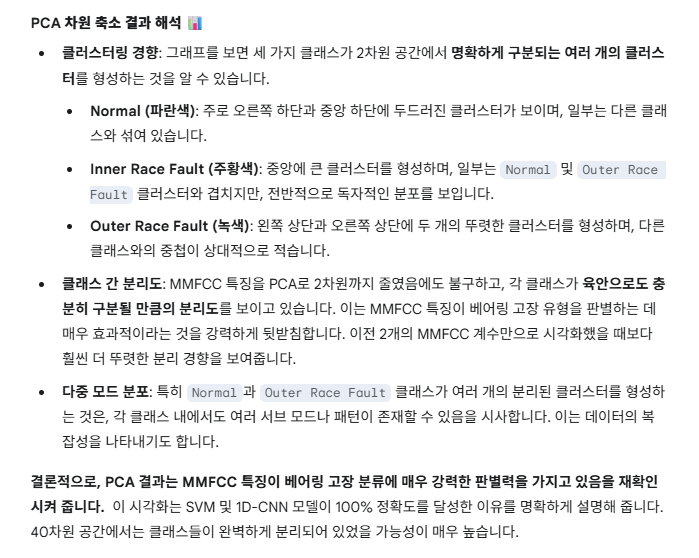

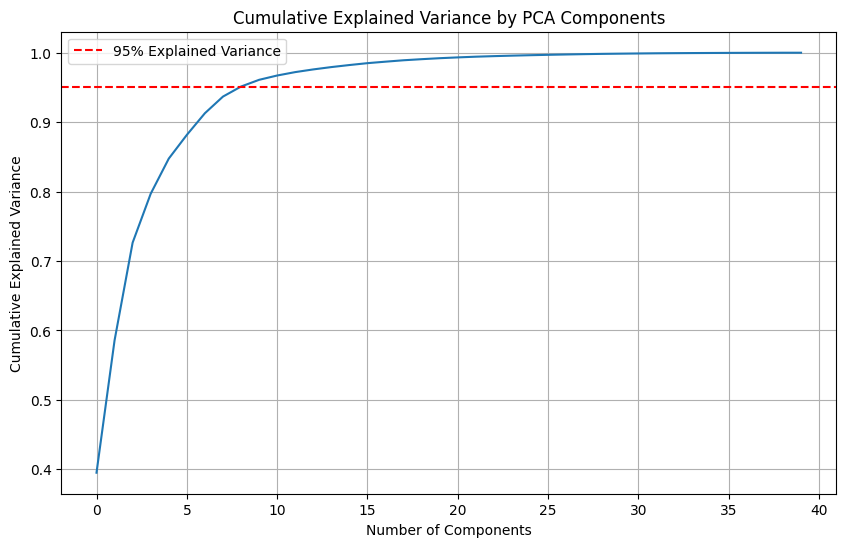


원본 분산의 95% 이상을 설명하는 최소 주성분 개수: 9개
해당 주성분 개수에서 설명되는 누적 분산율: 0.9513

MMFCC 특징이 40개에서 9개 주성분으로 축소되었습니다.
축소된 데이터 형태: (6480, 9)

PCA 특징 기반 학습 세트 크기: (5184, 9)
PCA 특징 기반 테스트 세트 크기: (1296, 9)

--- PCA 특징 기반 SVM 모델 학습 시작 ---
PCA 특징 기반 SVM 모델 학습 완료.

--- PCA 특징 기반 SVM 모델 평가 ---
정확도 (PCA 특징 기반): 1.0000

분류 보고서 (PCA 특징 기반):
                  precision    recall  f1-score   support

Inner Race Fault       1.00      1.00      1.00       432
          Normal       1.00      1.00      1.00       432
Outer Race Fault       1.00      1.00      1.00       432

        accuracy                           1.00      1296
       macro avg       1.00      1.00      1.00      1296
    weighted avg       1.00      1.00      1.00      1296



c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.conda\envs\br2\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jh\.

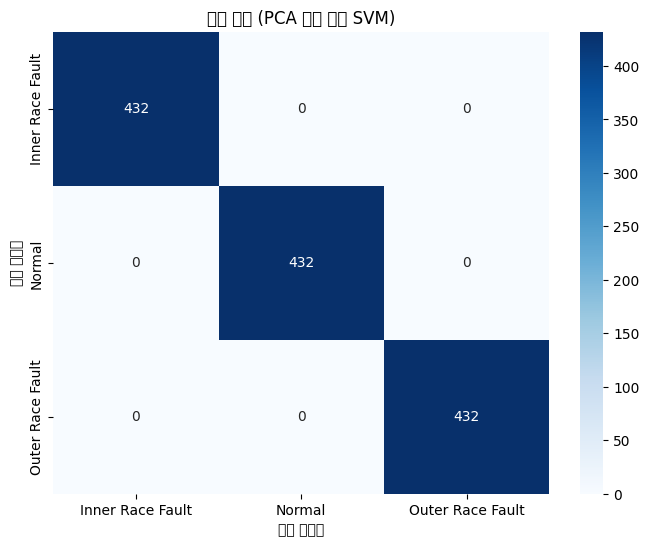


PCA 특징을 활용한 SVM 모델 학습 및 평가가 완료되었습니다.
원본 MMFCC 특징 기반 SVM 결과와 비교하여 계산 효율성과 성능을 평가할 수 있습니다.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 이전에 추출된 MMFCC 특징 DataFrame 'features_df'가 있다고 가정합니다.
# (features_df는 MMFCC 추출 코드 수정본을 통해 'filename' 컬럼이 포함되어 있어야 합니다.)

# 특징 (X)과 레이블 (y) 분리
X_original_mmfcc = features_df.drop(['label', 'filename'], axis=1)
y_original_labels = features_df['label']

# --- 1. PCA 적용 및 주성분 개수 결정 ---
# 데이터를 스케일링하여 PCA에 적합하게 만듭니다. (PCA는 스케일에 민감합니다)
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_original_mmfcc)

# PCA 적용 (설명 분산율을 보고 개수를 결정하기 위해 일단 전체 주성분 개수를 지정)
pca = PCA(n_components=X_scaled_pca.shape[1]) # MMFCC 특징의 총 개수 (40)
pca.fit(X_scaled_pca)

# 설명 분산율(explained_variance_ratio_) 시각화
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

# 95% 설명 분산율을 넘어서는 최소 주성분 개수 찾기
n_components_95 = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1
print(f"\n원본 분산의 95% 이상을 설명하는 최소 주성분 개수: {n_components_95}개")
print(f"해당 주성분 개수에서 설명되는 누적 분산율: {np.cumsum(pca.explained_variance_ratio_)[n_components_95 - 1]:.4f}")

# 선택된 주성분 개수로 PCA 재적용 (데이터 변환)
pca_final = PCA(n_components=n_components_95)
X_pca_transformed = pca_final.fit_transform(X_scaled_pca)

print(f"\nMMFCC 특징이 {X_original_mmfcc.shape[1]}개에서 {n_components_95}개 주성분으로 축소되었습니다.")
print(f"축소된 데이터 형태: {X_pca_transformed.shape}")

# --- 2. 데이터 분할 및 SVM 모델 학습/평가 (PCA 특징 사용) ---

# 레이블 인코딩
label_encoder_svm_pca = LabelEncoder()
y_encoded_svm_pca = label_encoder_svm_pca.fit_transform(y_original_labels)

# 학습 세트와 테스트 세트 분할 (PCA 특징 사용)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_transformed, y_encoded_svm_pca, test_size=0.2, random_state=42, stratify=y_encoded_svm_pca
)

print(f"\nPCA 특징 기반 학습 세트 크기: {X_train_pca.shape}")
print(f"PCA 특징 기반 테스트 세트 크기: {X_test_pca.shape}")

# SVM 모델 학습 (Gaussian Kernel)
print("\n--- PCA 특징 기반 SVM 모델 학습 시작 ---")
svm_model_pca = SVC(kernel='rbf', random_state=42) # SVM-G
svm_model_pca.fit(X_train_pca, y_train_pca)
print("PCA 특징 기반 SVM 모델 학습 완료.")

# --- 3. 모델 평가 ---
print("\n--- PCA 특징 기반 SVM 모델 평가 ---")

# 테스트 세트 예측
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)

# 정확도
accuracy_svm_pca = accuracy_score(y_test_pca, y_pred_svm_pca)
print(f"정확도 (PCA 특징 기반): {accuracy_svm_pca:.4f}")

# 분류 보고서
print("\n분류 보고서 (PCA 특징 기반):")
print(classification_report(y_test_pca, y_pred_svm_pca, target_names=label_encoder_svm_pca.classes_))

# --- 혼동 행렬 시각화 (수정된 부분) ---
# 숫자 레이블을 다시 원본 문자열 레이블로 변환
y_test_pca_labels = label_encoder_svm_pca.inverse_transform(y_test_pca)
y_pred_svm_pca_labels = label_encoder_svm_pca.inverse_transform(y_pred_svm_pca)

conf_matrix_svm_pca = confusion_matrix(y_test_pca_labels, y_pred_svm_pca_labels, labels=label_encoder_svm_pca.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder_svm_pca.classes_, yticklabels=label_encoder_svm_pca.classes_)
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('혼동 행렬 (PCA 특징 기반 SVM)')
plt.show()

print("\nPCA 특징을 활용한 SVM 모델 학습 및 평가가 완료되었습니다.")
print("원본 MMFCC 특징 기반 SVM 결과와 비교하여 계산 효율성과 성능을 평가할 수 있습니다.")
